# Project 10: Chapter 8: Advanced Data Analysis

## Using a Double Index to Work with Panel Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3", "Year"],
                  parse_dates = True).rename(columns = {"Summary": "EFW"})
data

Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01                               NaN          NaN   
           1974-01-01                               NaN          NaN   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        1970-01-01                               NaN         NaN   
           1971-01-01                               NaN         NaN   
           1972-01-01                               NaN         NaN   
           1973-01-01                               NaN         NaN   
           1974-01-01                               NaN         NaN   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AGO        1970-01-01              NaN  
           1971-01-01              NaN  
           1972-01-01              NaN  
           1973-01-01              NaN  
           1974-01-01              NaN  
...                                ...  
ZWE        2014-01-01         0.215452  
           2015-01-01         0.106888  
           2016-01-01         0.012463  
           2017-01-01        -0.013579  
           2018-01-01         0.004606  

[8085 rows x 8 columns]

In [2]:
data.index[0]

('AGO', Timestamp('1970-01-01 00:00:00'))

## Isolate each indiviual that comprises the multiindex

In [3]:
countries = data.index.get_level_values("ISO_Code_3").unique()
countries

Index(['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       ...
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='ISO_Code_3', length=165)

In [4]:
years = data.index.get_level_values("Year").unique()
years

DatetimeIndex(['1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [5]:
def create_indicator_variable(data, indicator_name, index_name, target_index_list):
    data[indicator_name] = 0
    data[indicator_name][data.index.get_level_values(index_name).isin(target_index_list)] = 1
#    for index in target_index_list:
 #       data.loc[data.index.get_level_values(
  #      index_name) == index, [indicator_name]] = 1

index_name = data.index.names[0]
indicator_name = "North America"
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
                             "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
                             "TTO", "USA"]

create_indicator_variable(data = data,
                         indicator_name = indicator_name,
                         index_name = index_name,
                         target_index_list = countries_in_north_america)
data.loc["USA"]

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_47779/1919337489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name][data.index.get_level_values(index_name).isin(target_index_list)] = 1


,Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita,North America
Year,,,,,,,,,
1970-01-01,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,NaN,1
1971-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1972-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1973-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1975-01-01,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,0.080100,1
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1977-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1978-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Plotting Indicator Variables in Scatter

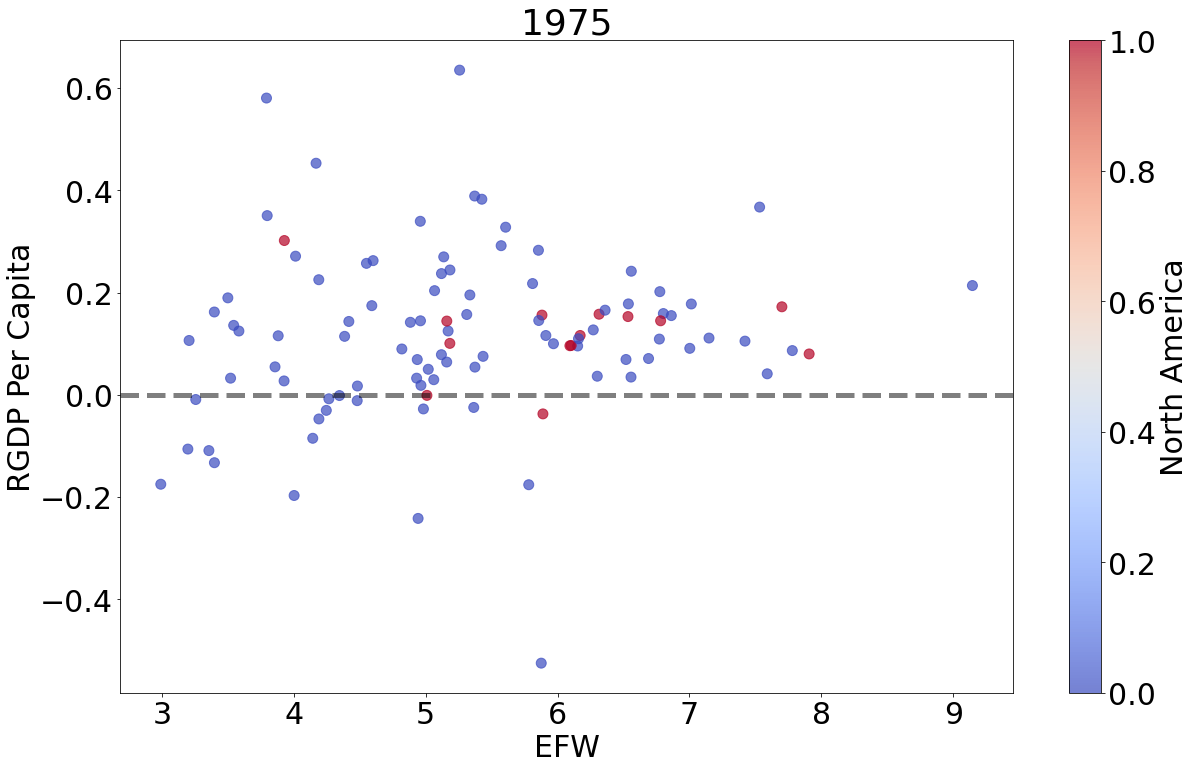

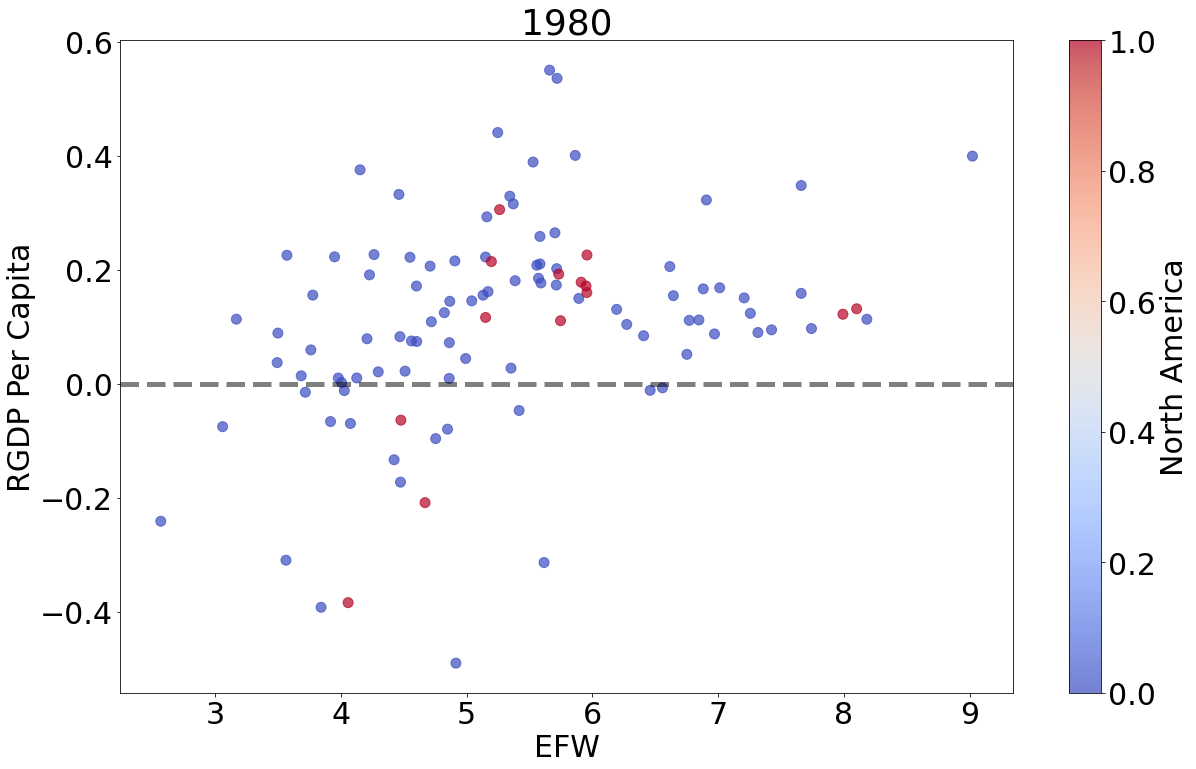

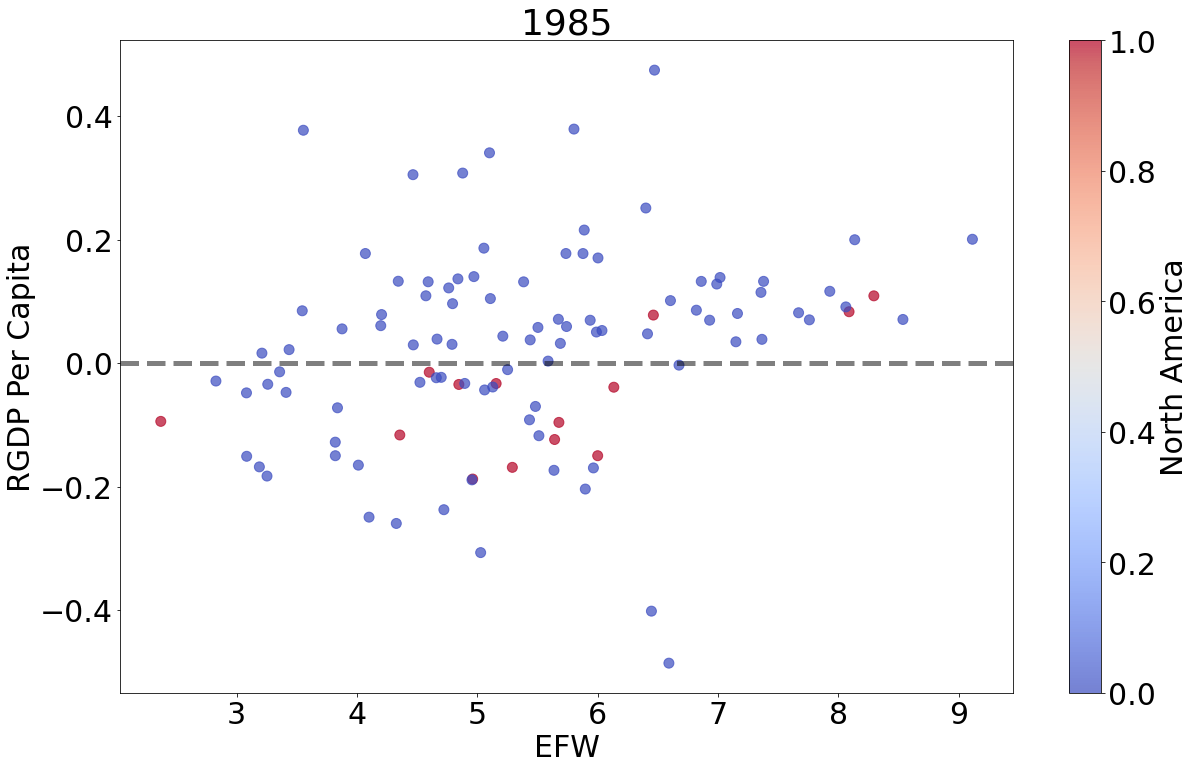

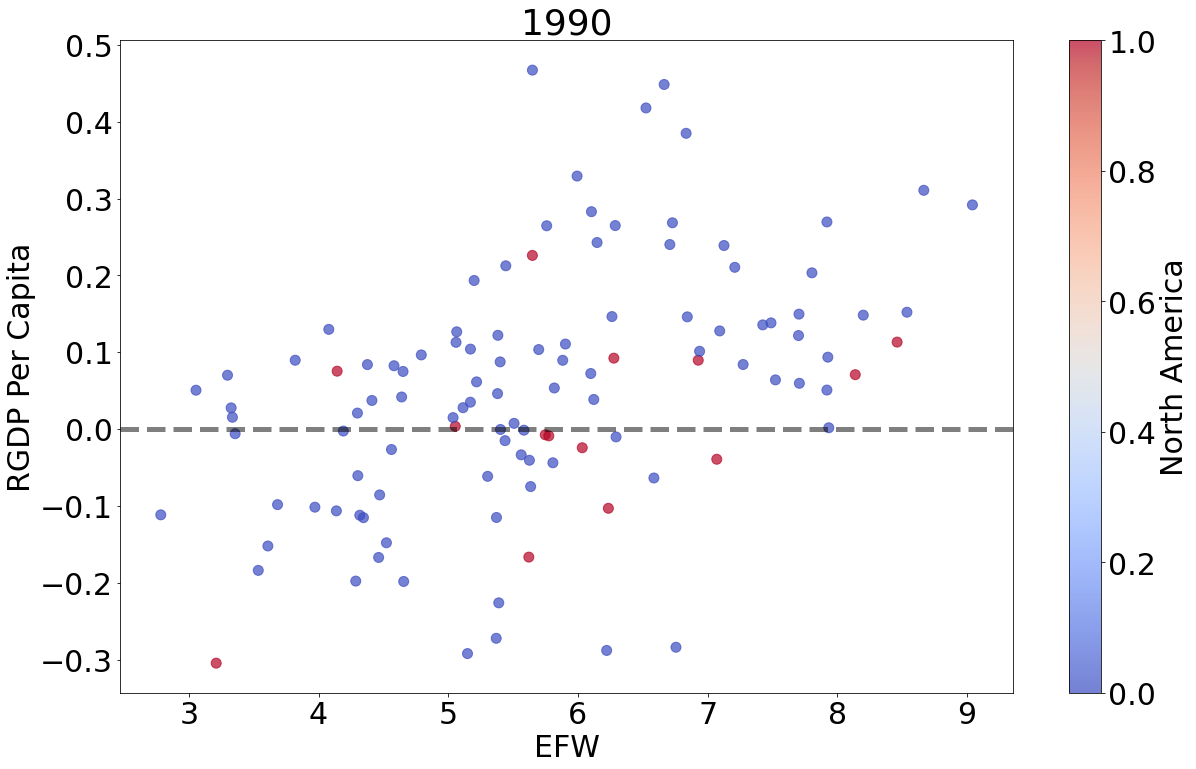

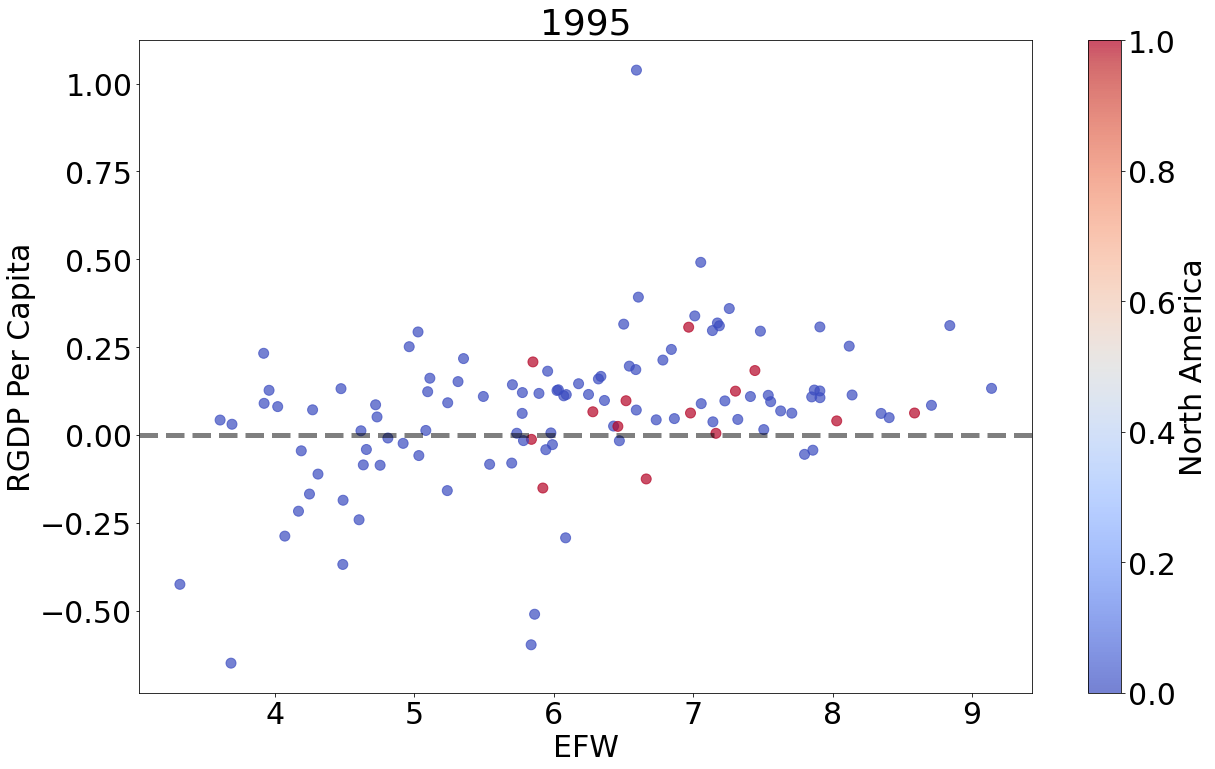

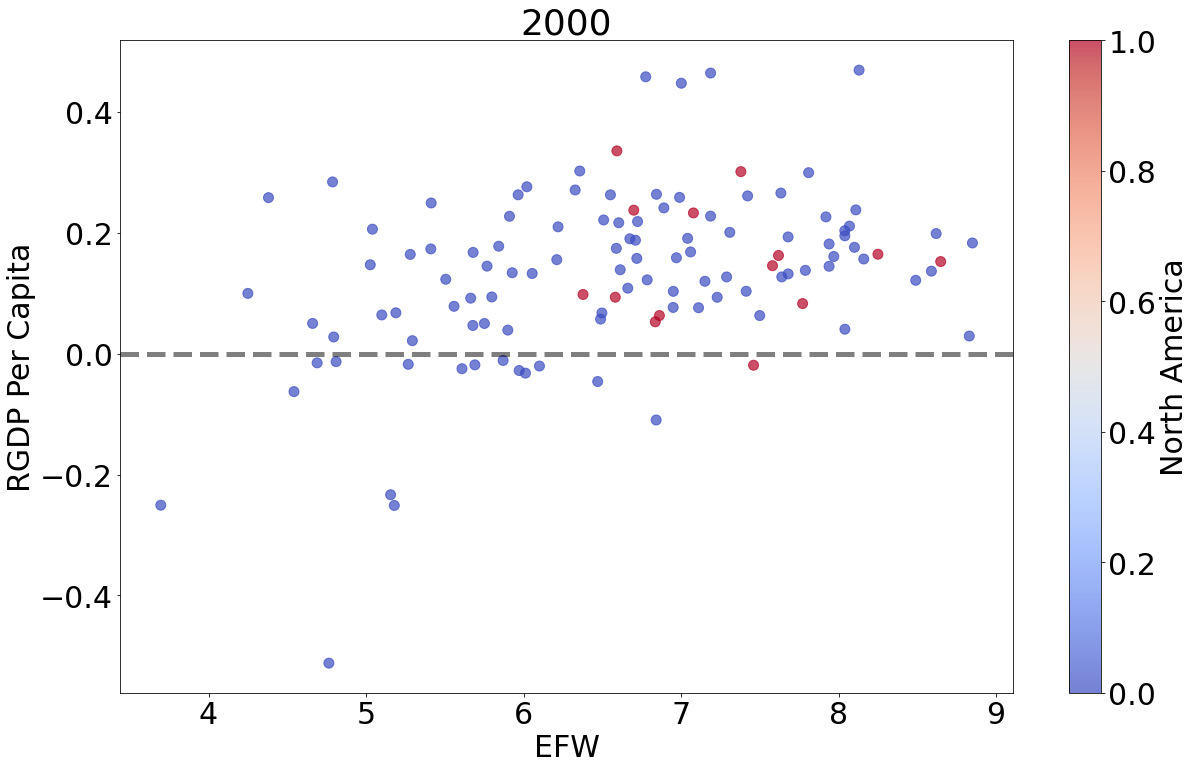

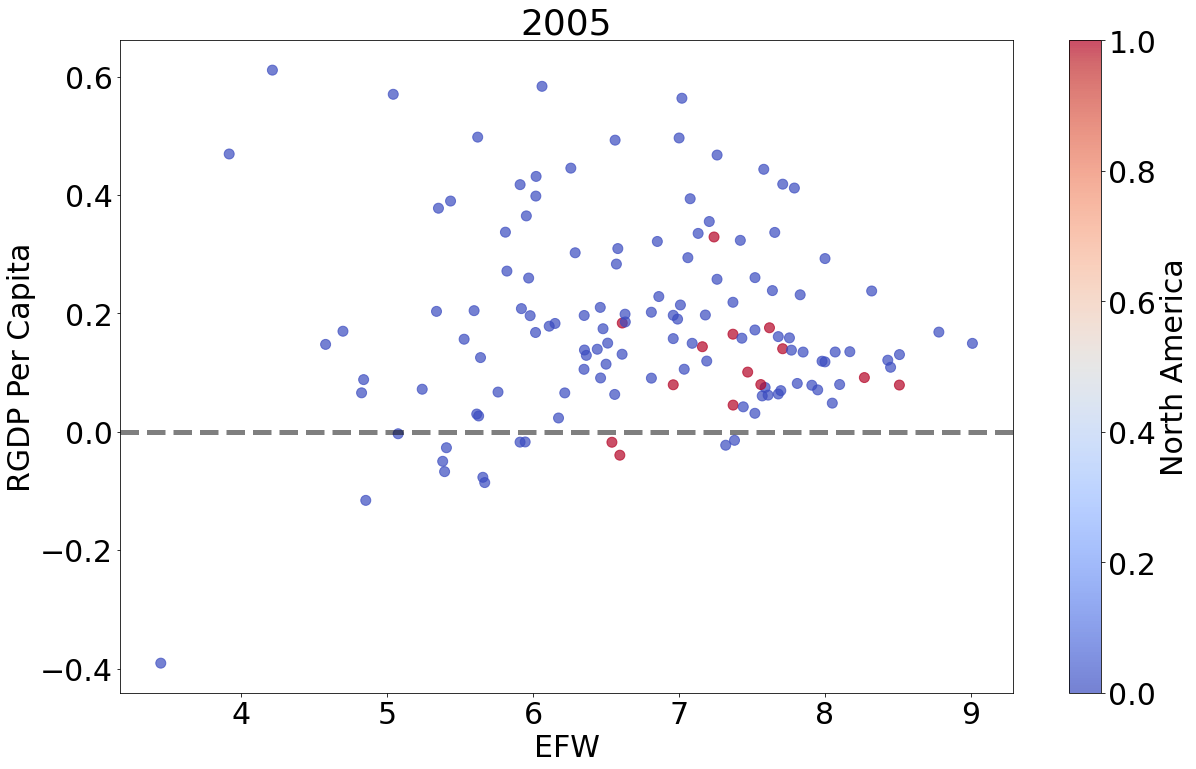

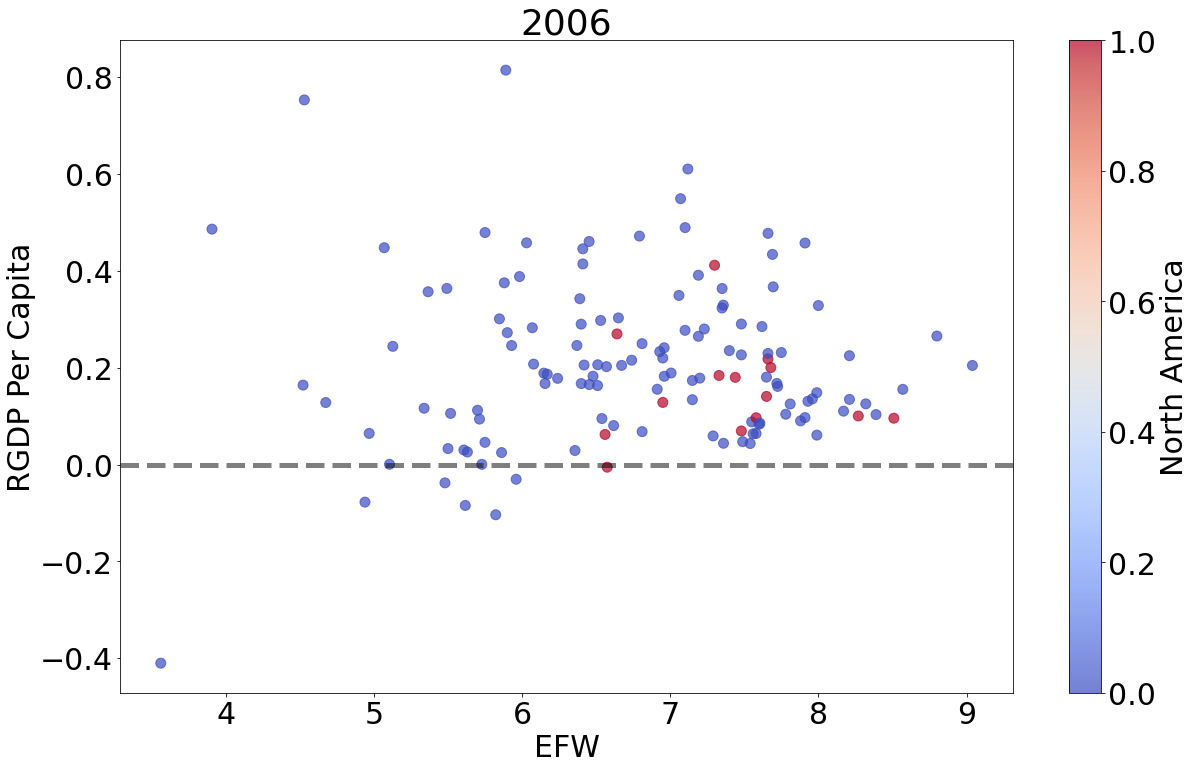

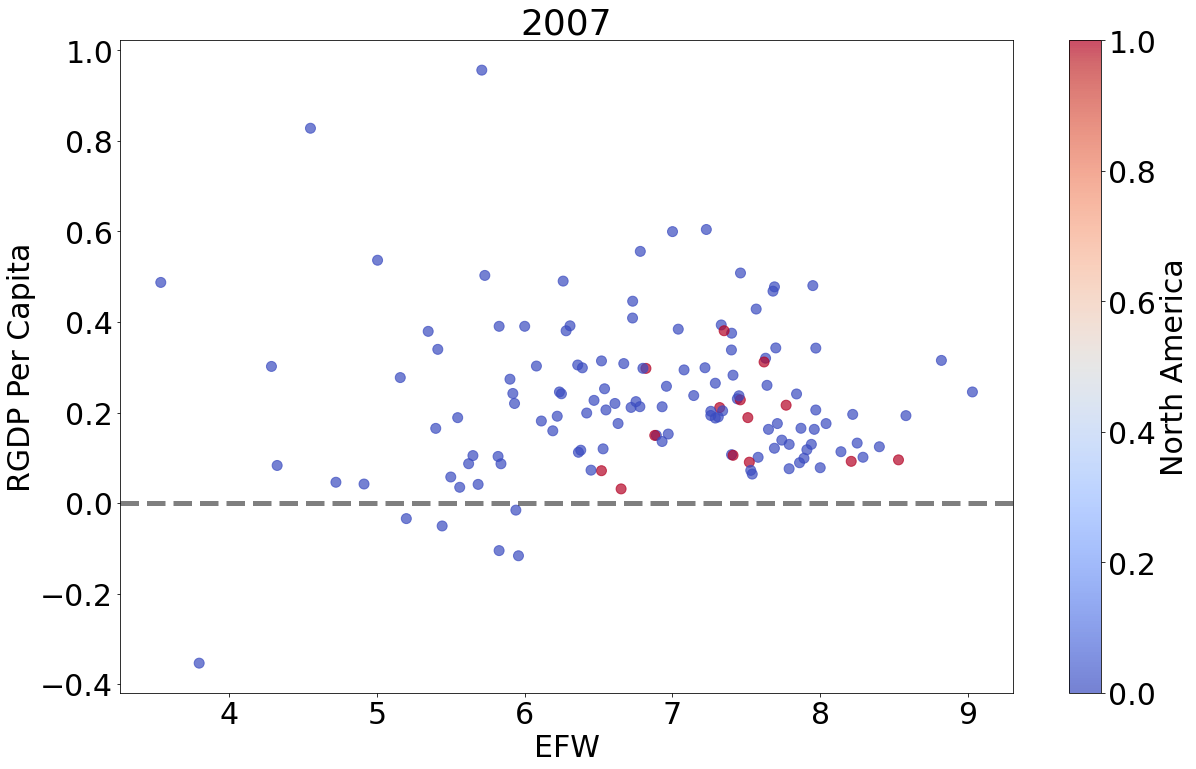

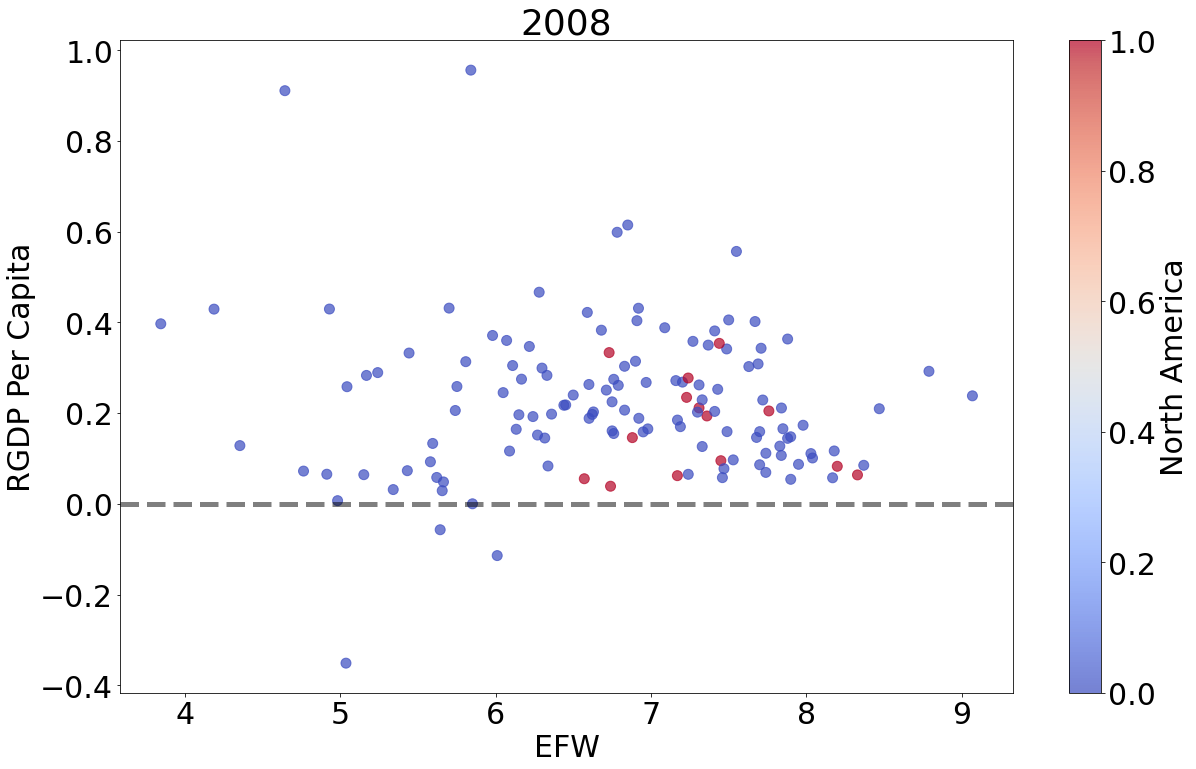

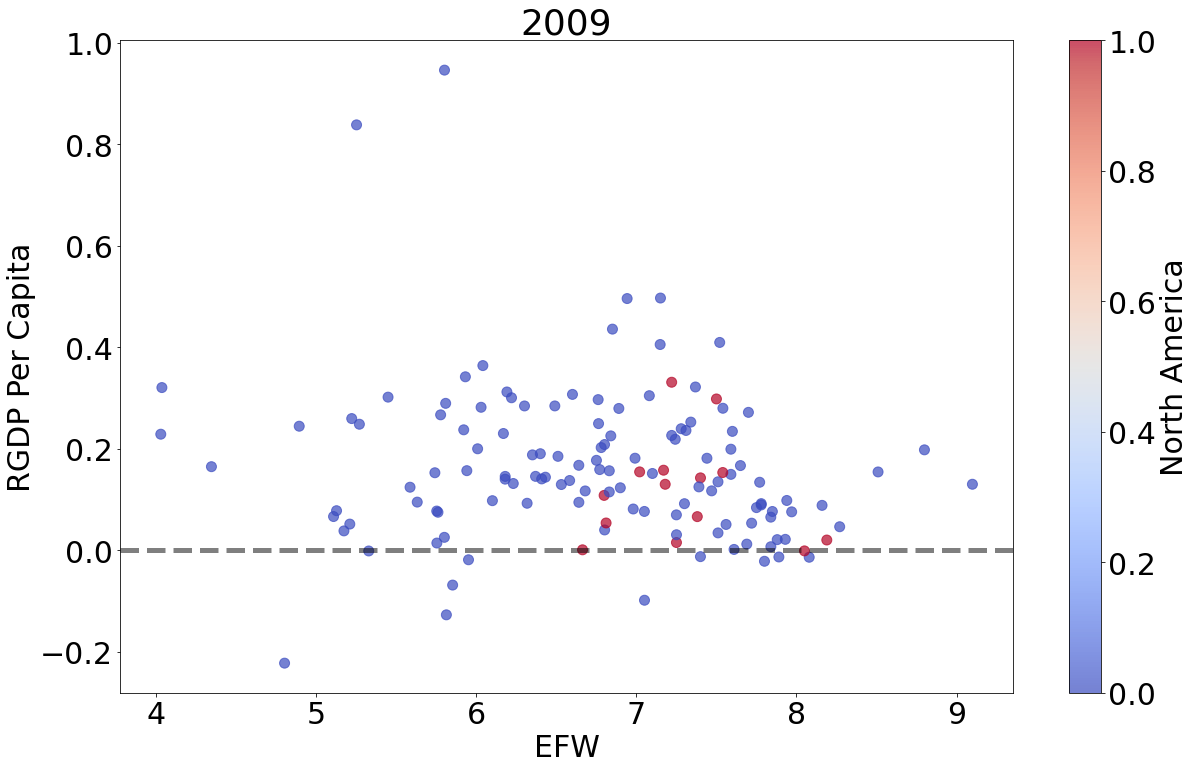

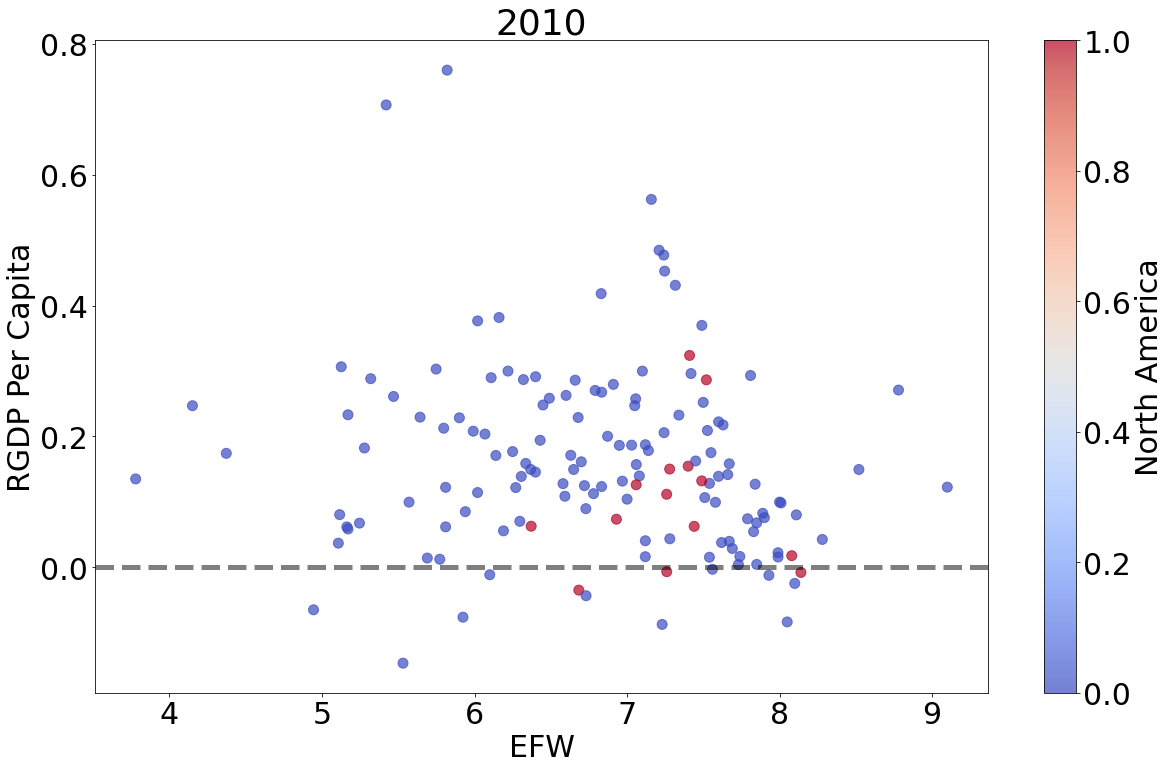

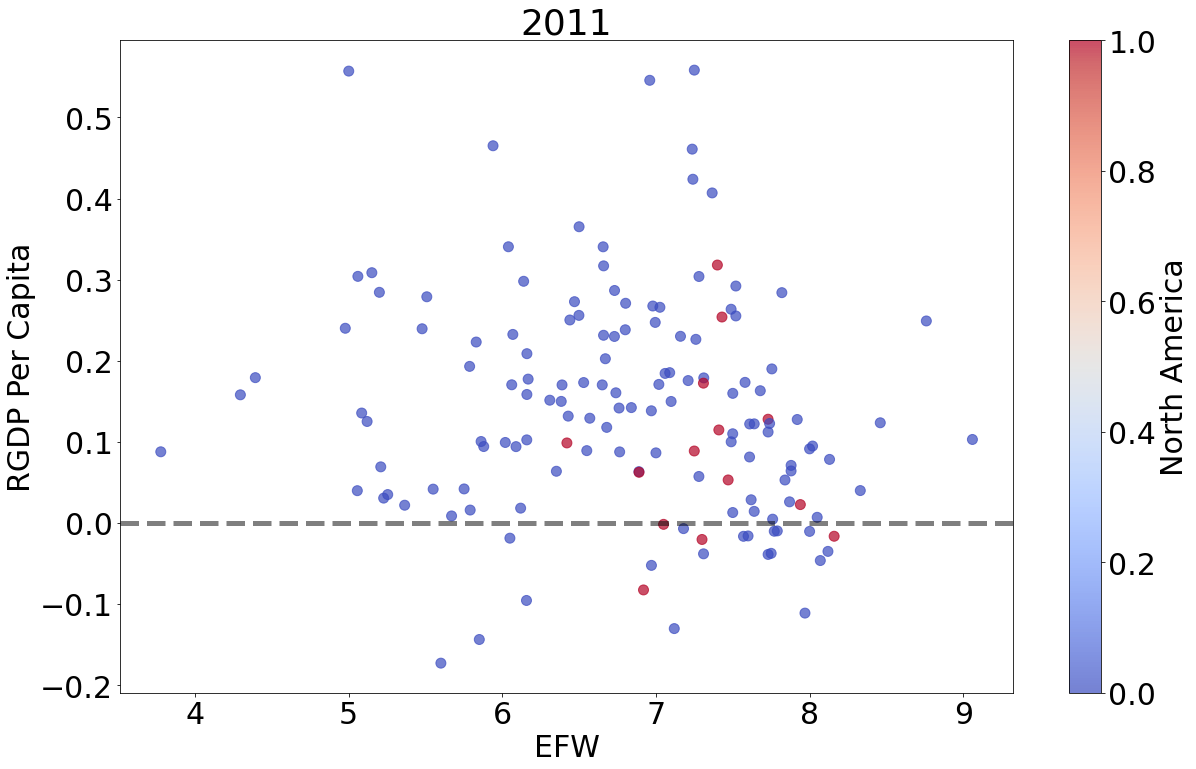

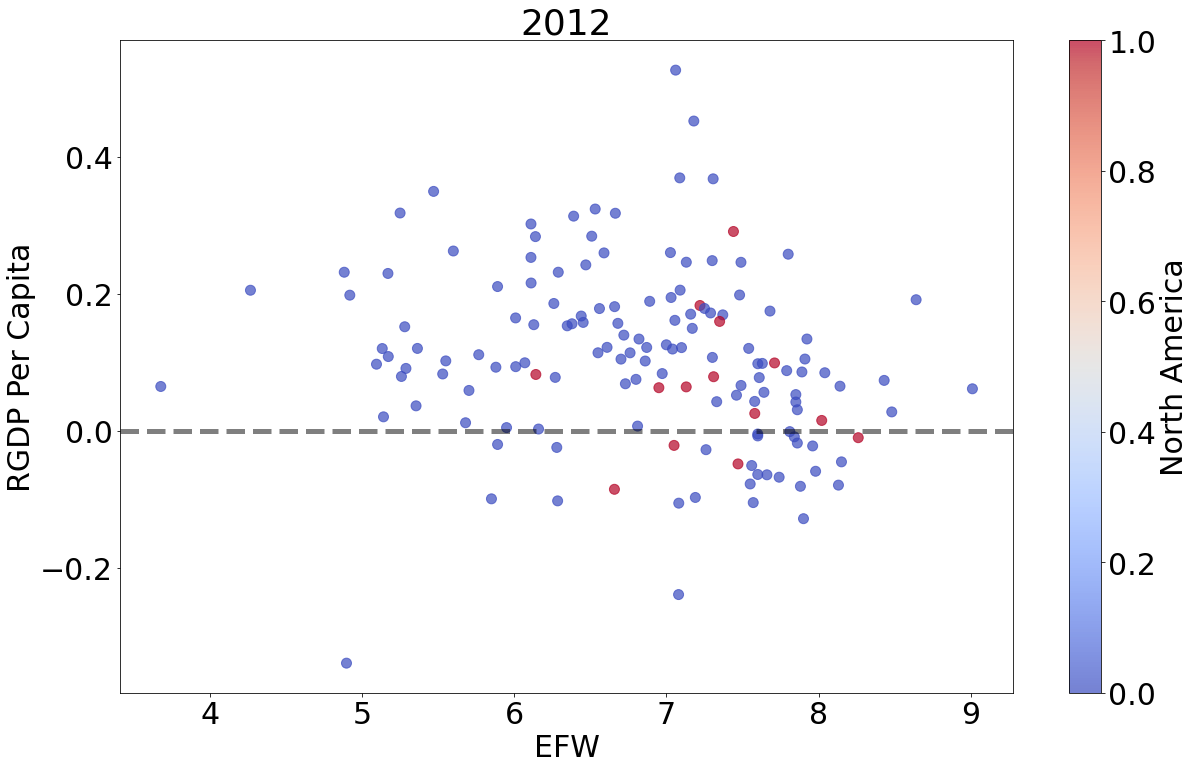

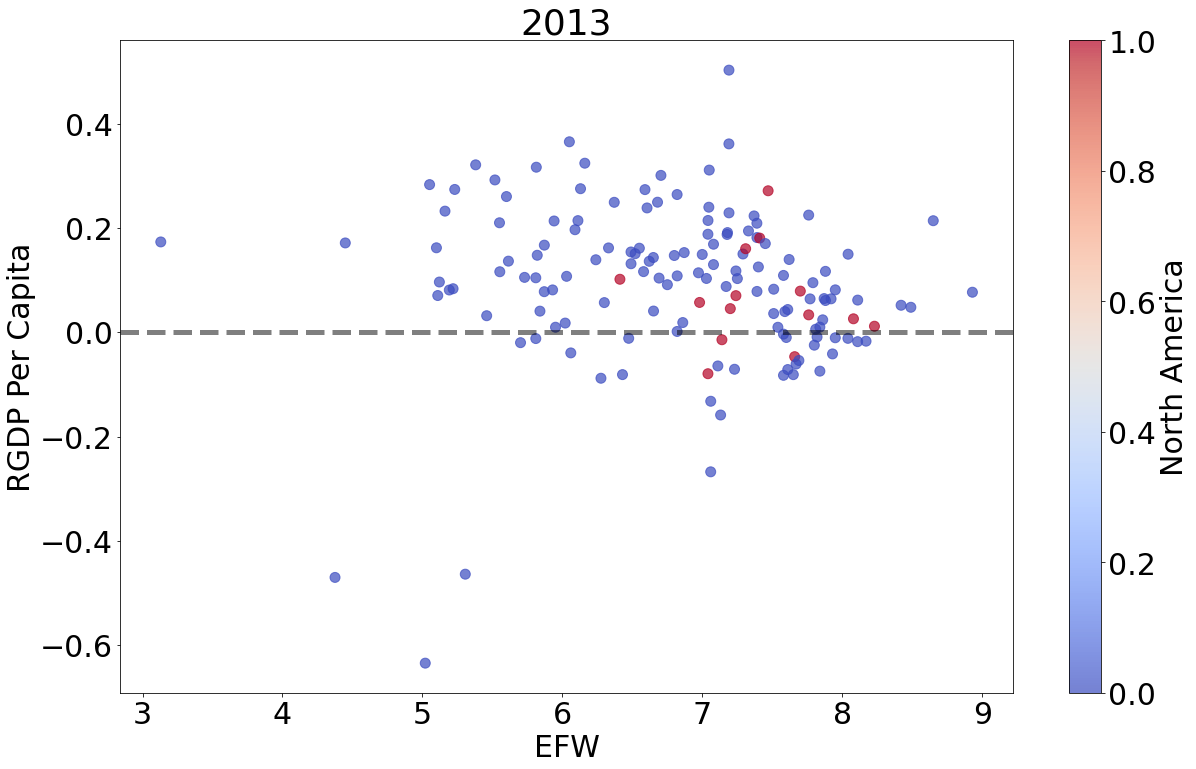

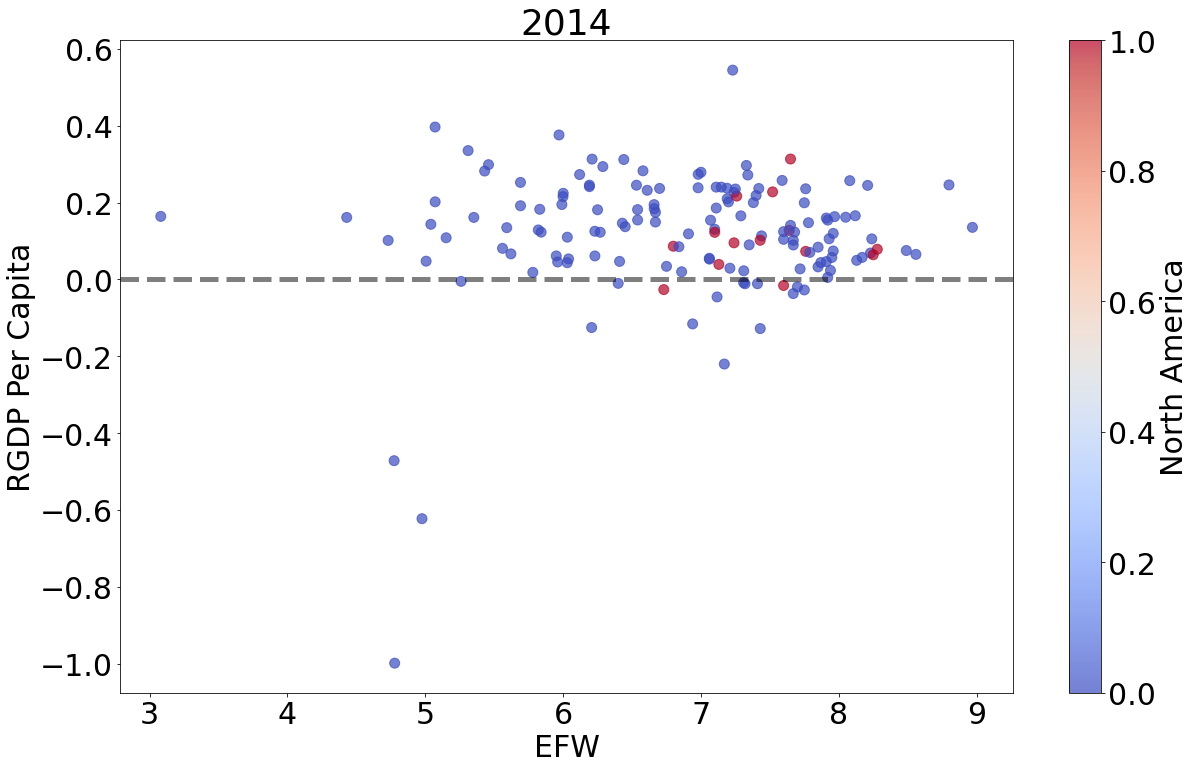

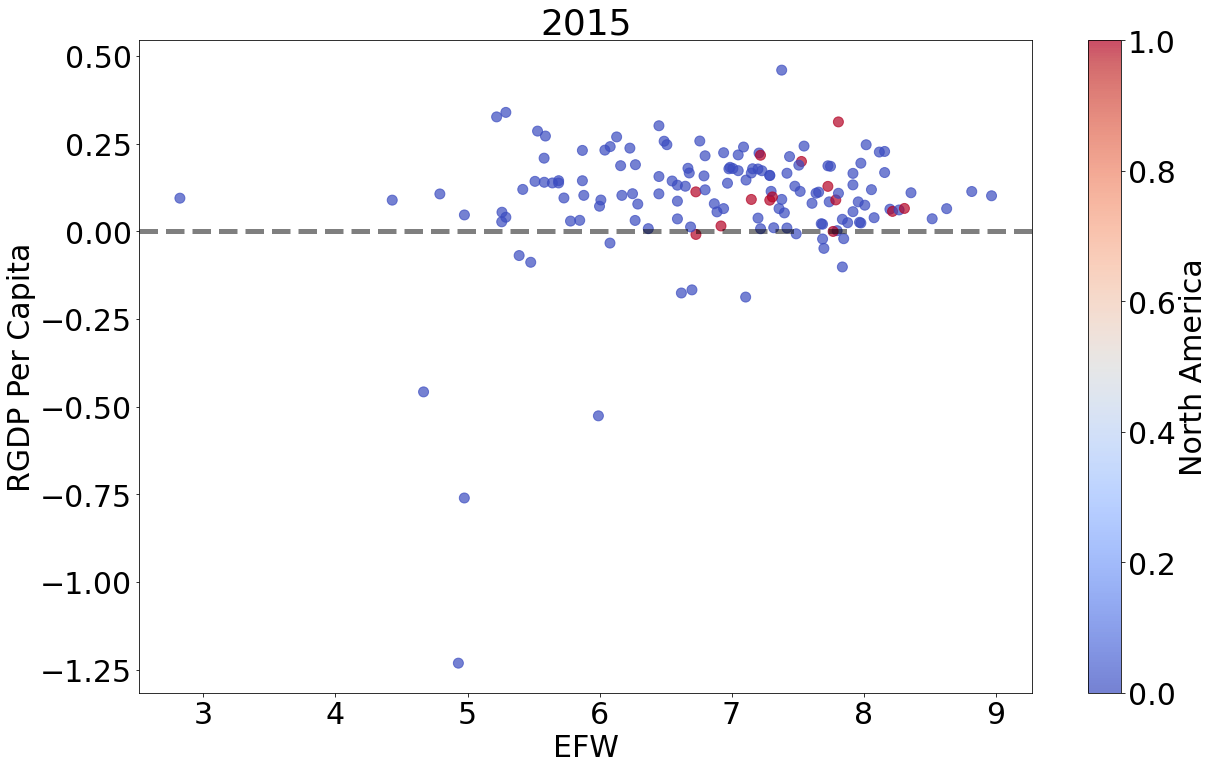

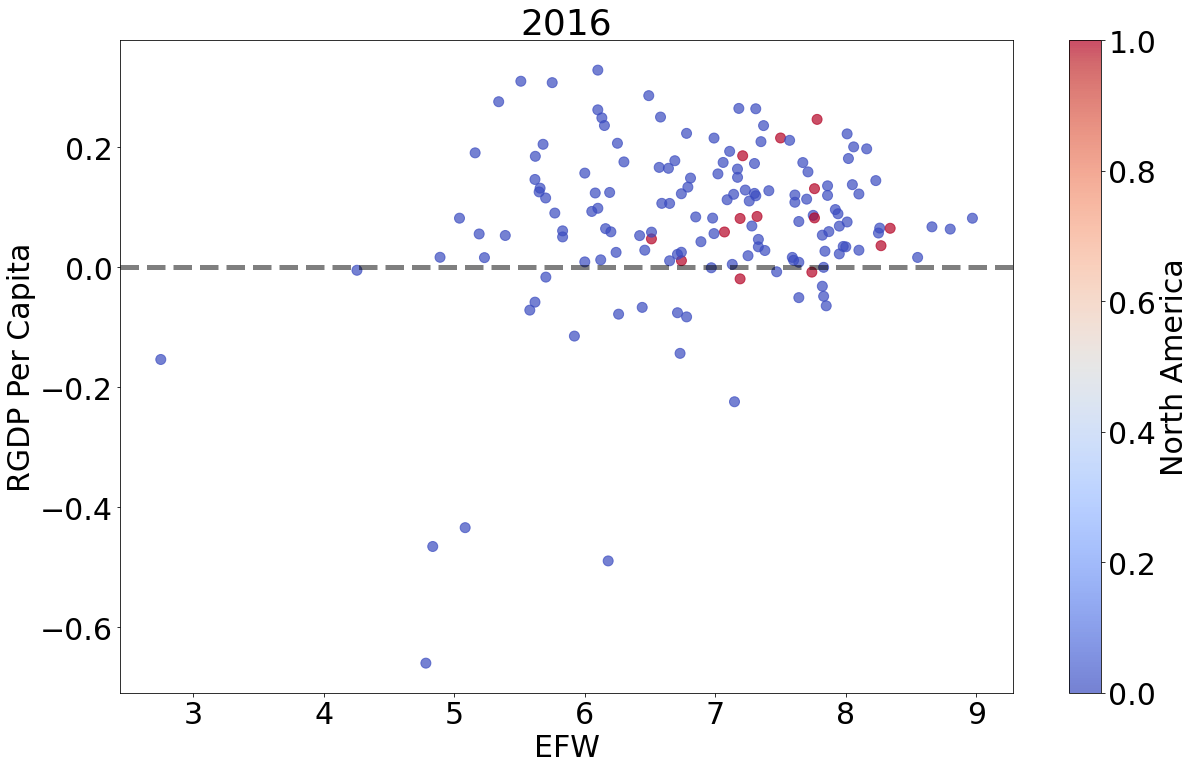

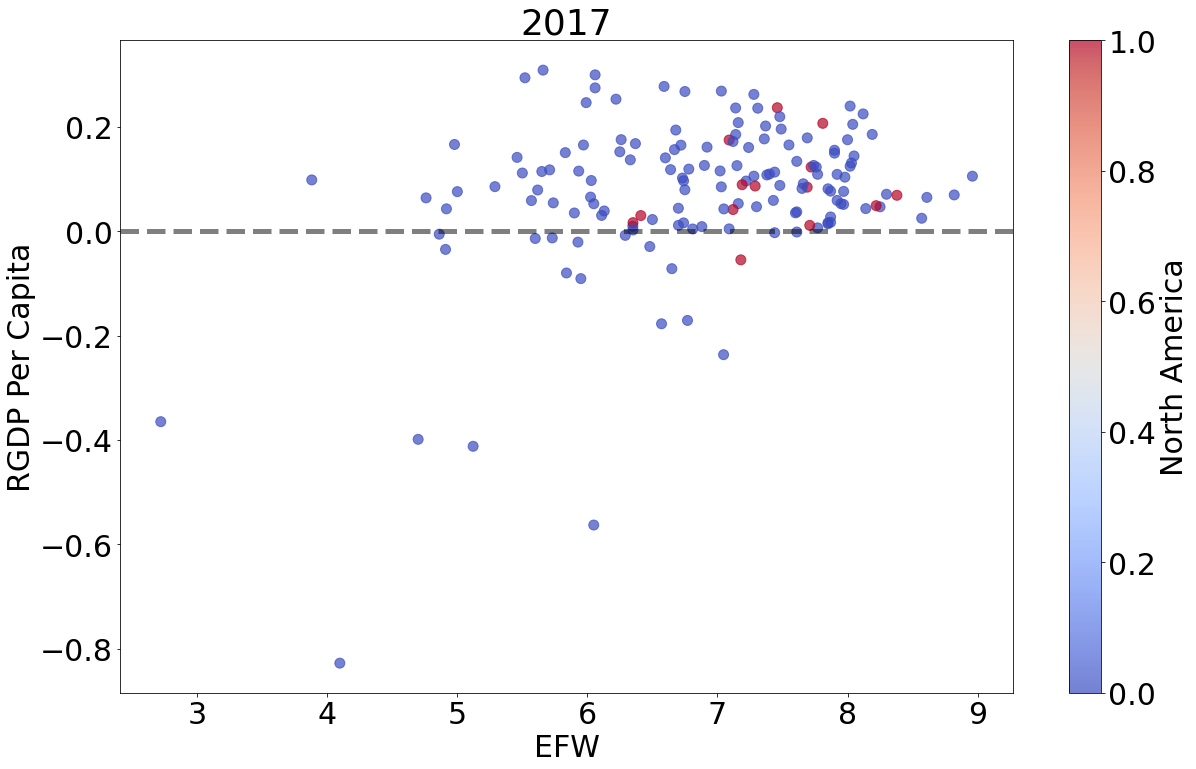

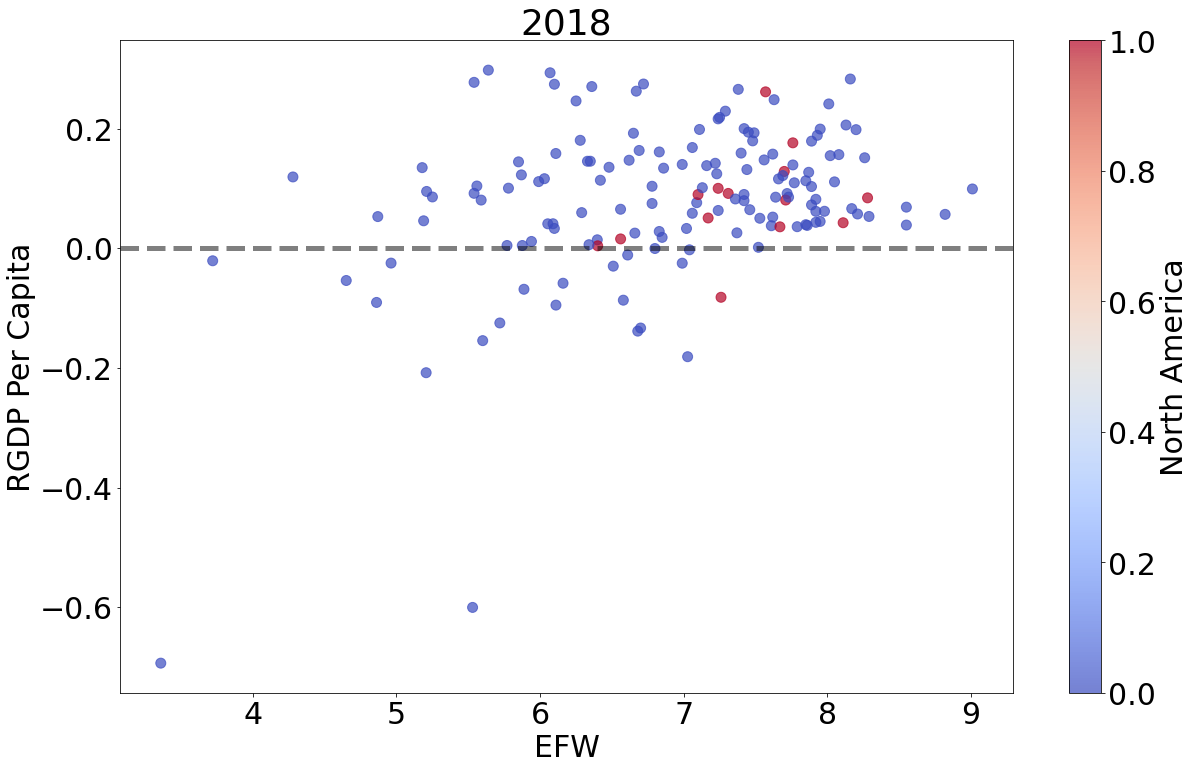

In [11]:
plt.rcParams.update({"font.size": 30})
years = data.dropna(subset = ["RGDP Per Capita"]).index.get_level_values("Year").unique()
for year in years:
#year = "2000"
    plot_data = data[data.index.get_level_values("Year") == year]
    fig, ax = plt.subplots(figsize = (20,12))
    plot_data.plot.scatter(x = "EFW",
                          y = "RGDP Per Capita",
                          c = "North America",
                          cmap = "coolwarm",
                          s = 100,
                          alpha = 0.7,
                          ax = ax)
    ax.set_title(str(year)[:4])
    ax.axhline(0, ls = "--", color = "k", alpha = 0.5, linewidth = 5)

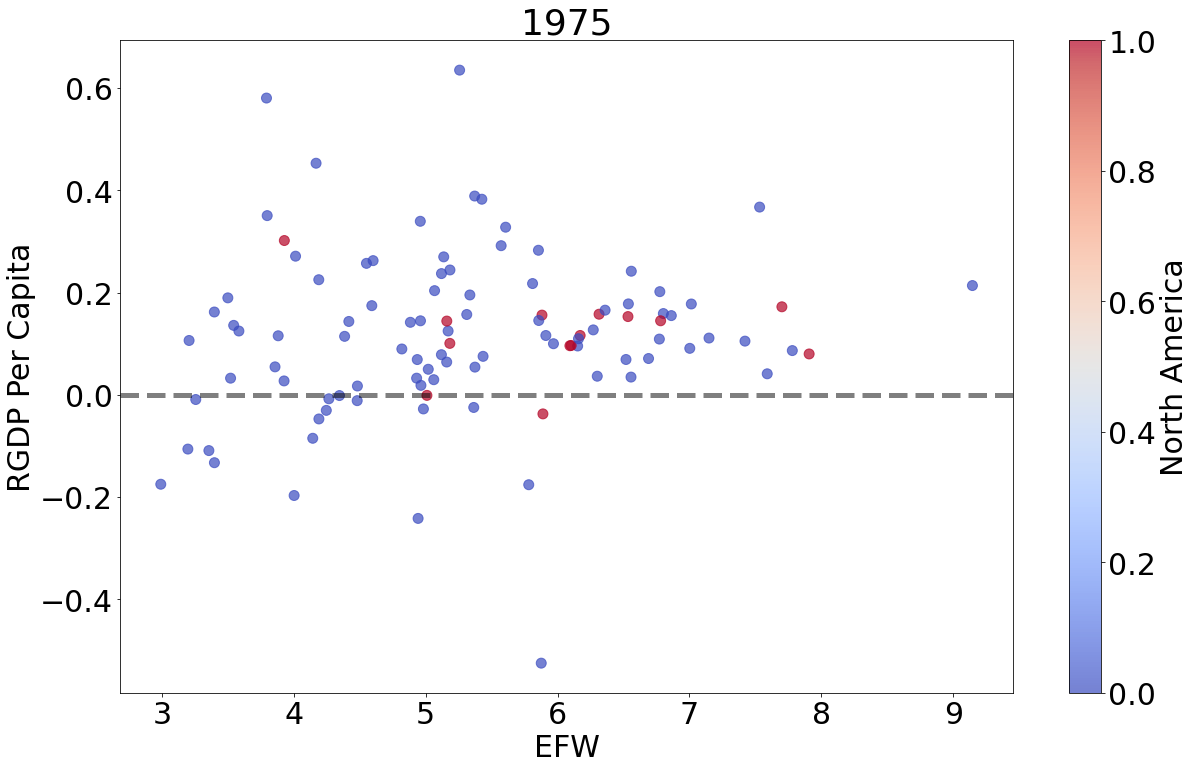

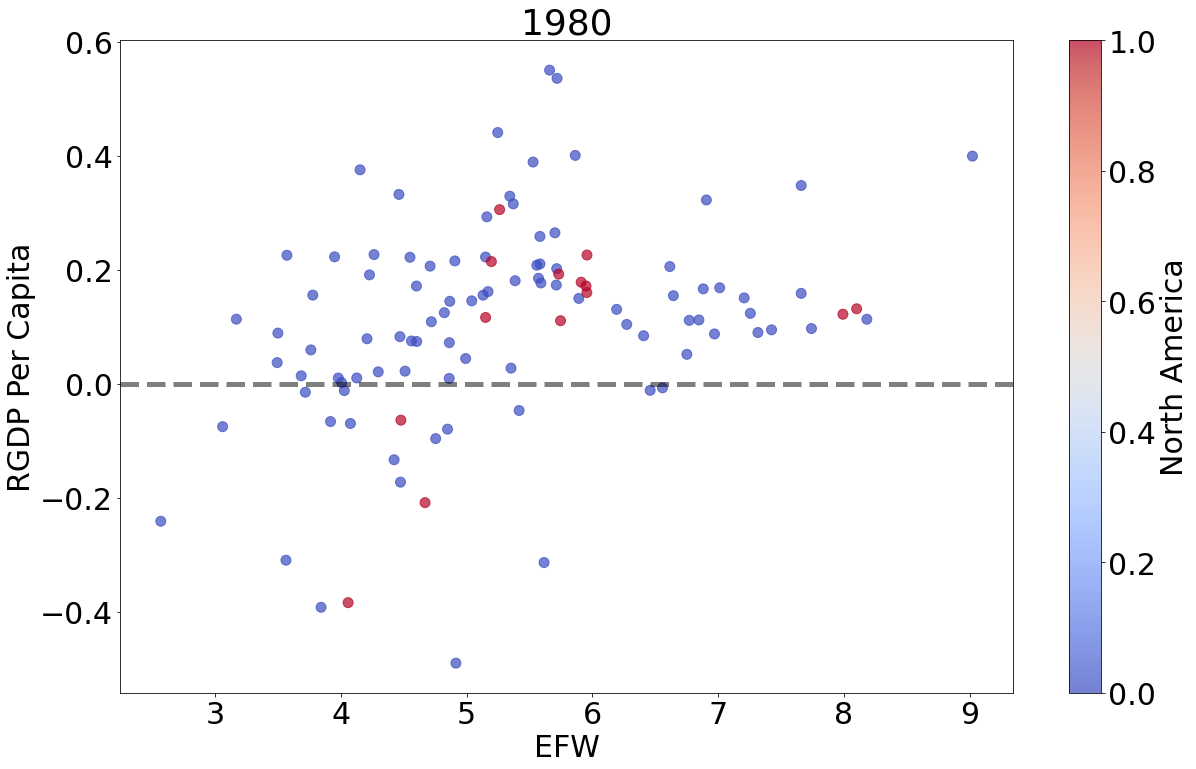

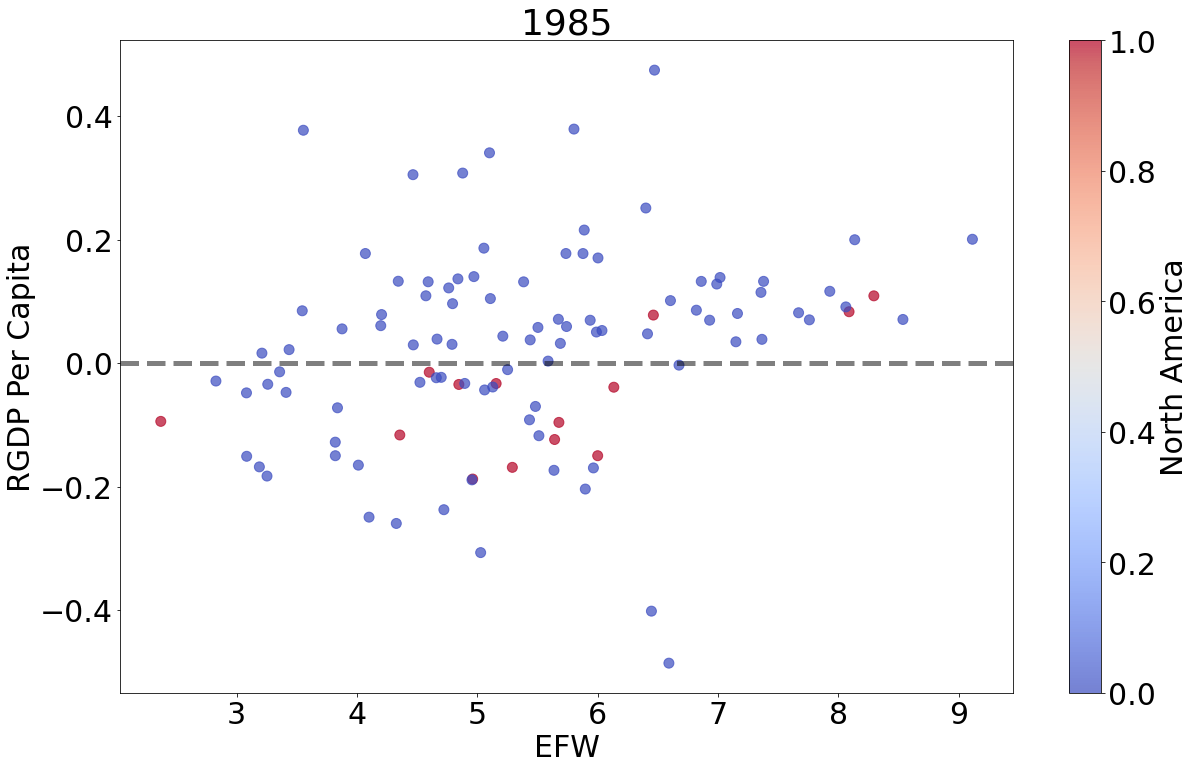

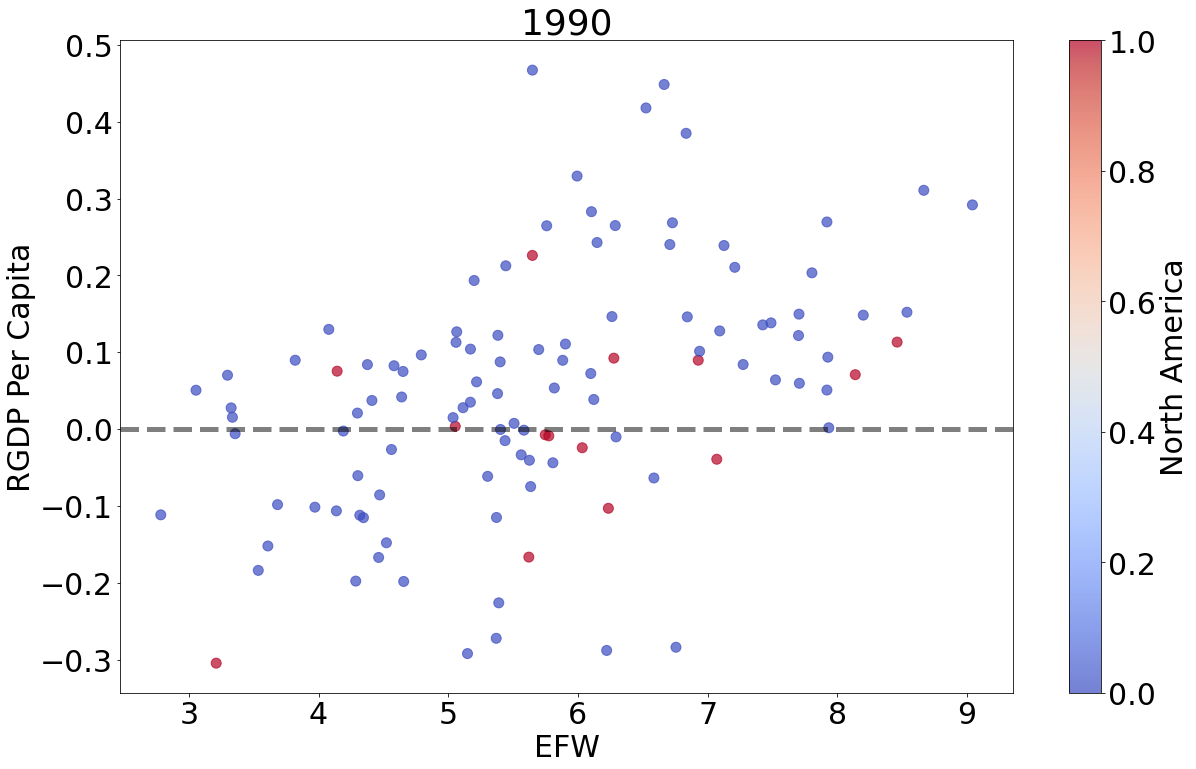

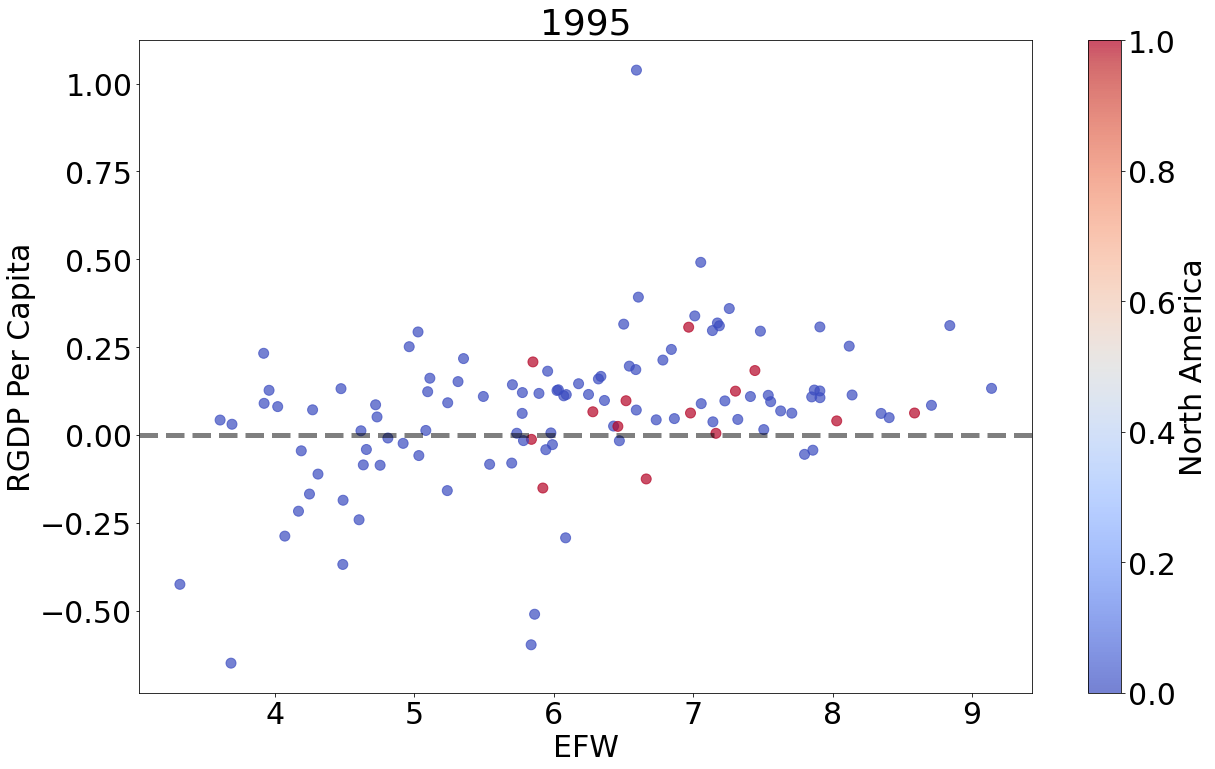

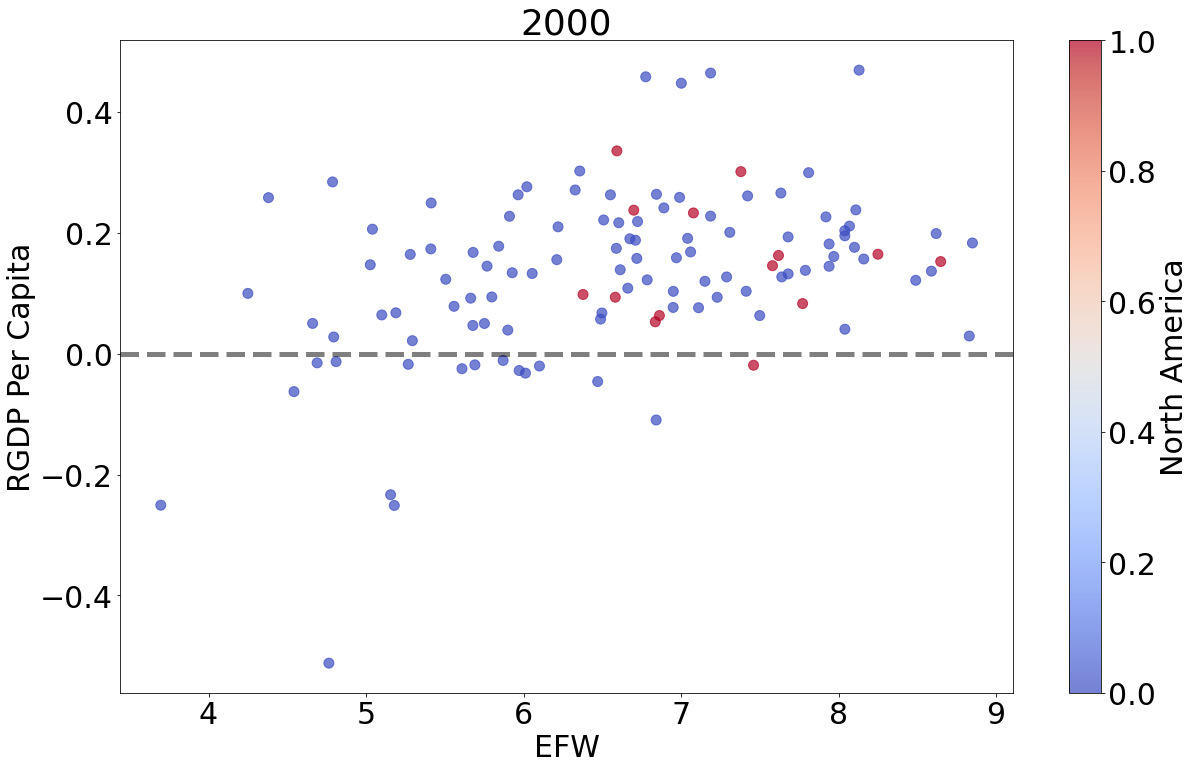

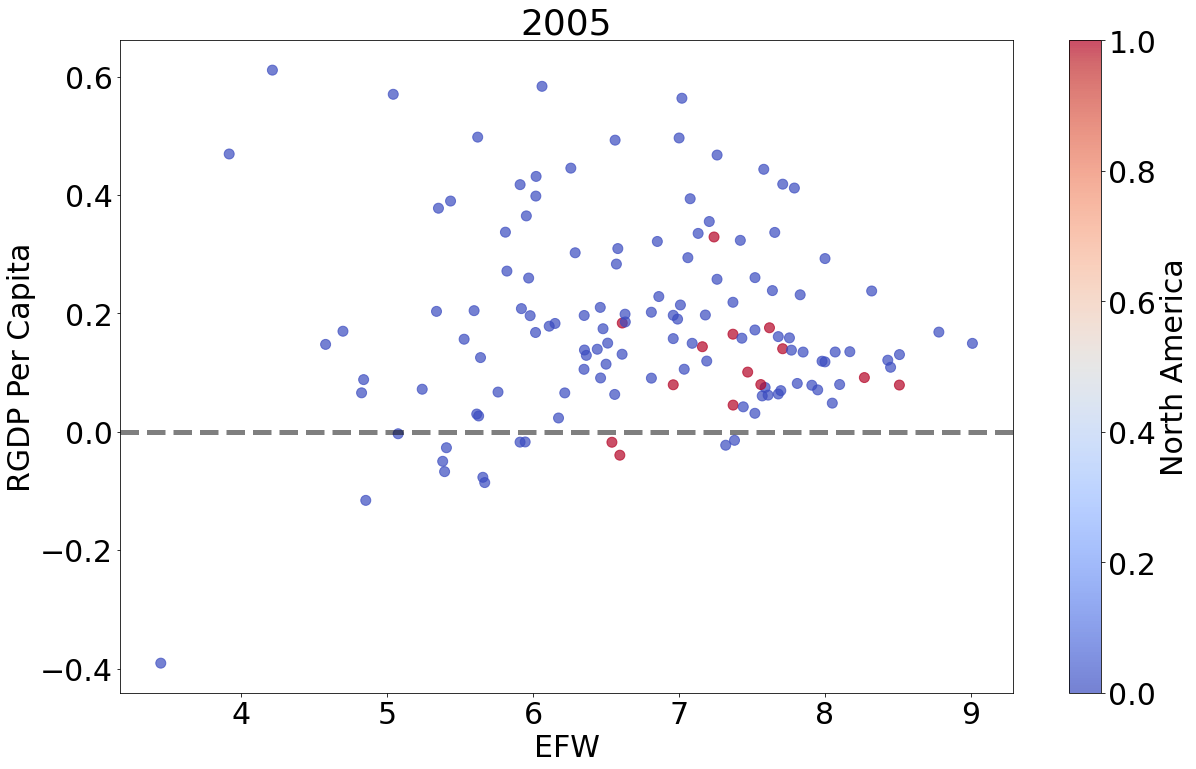

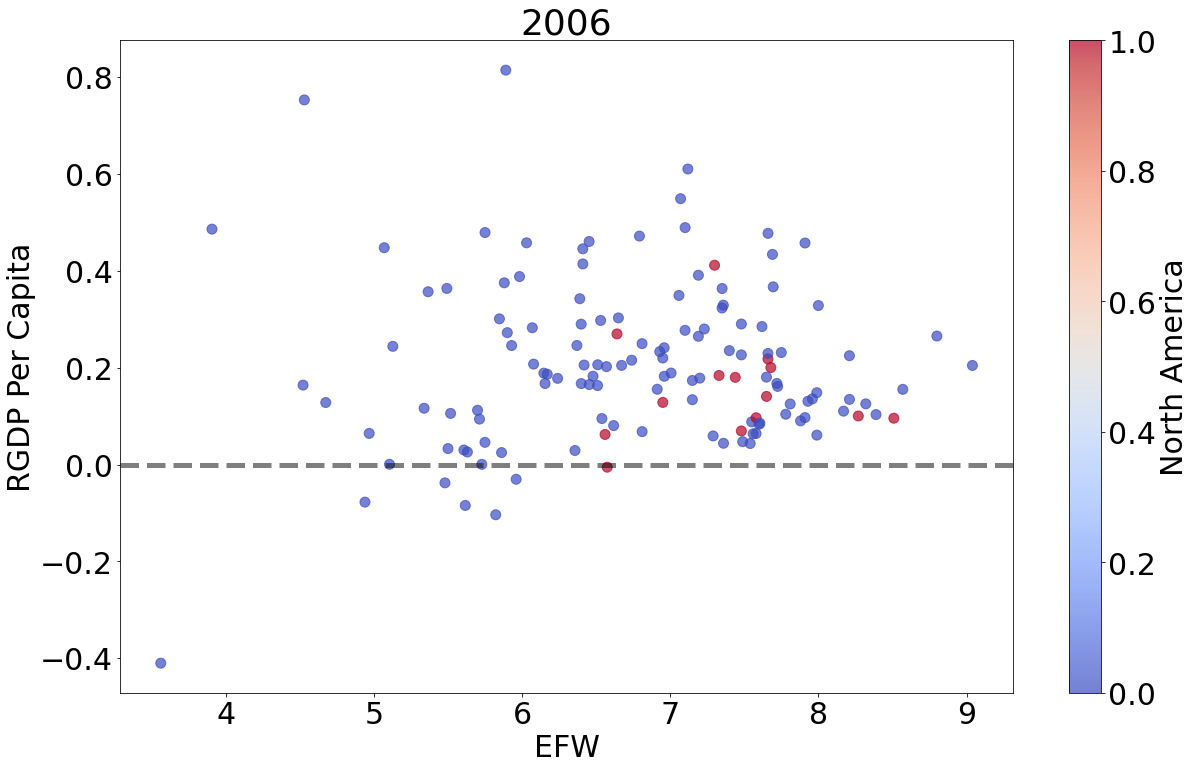

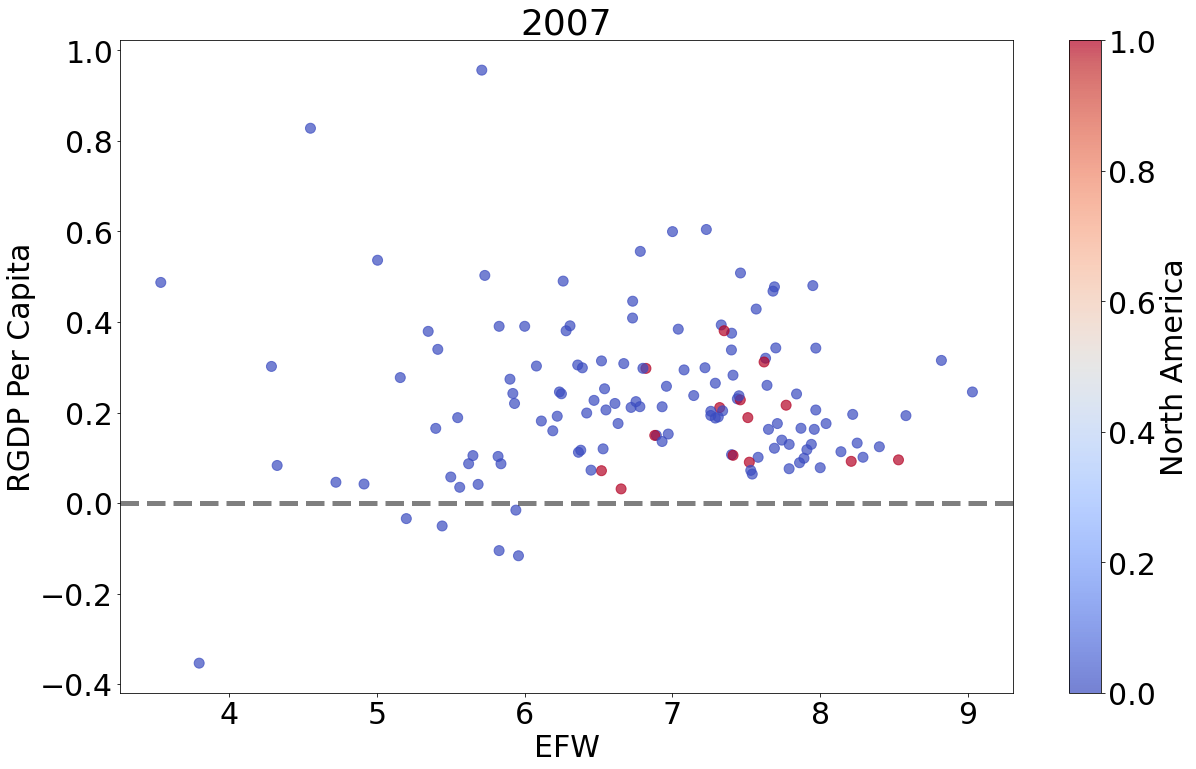

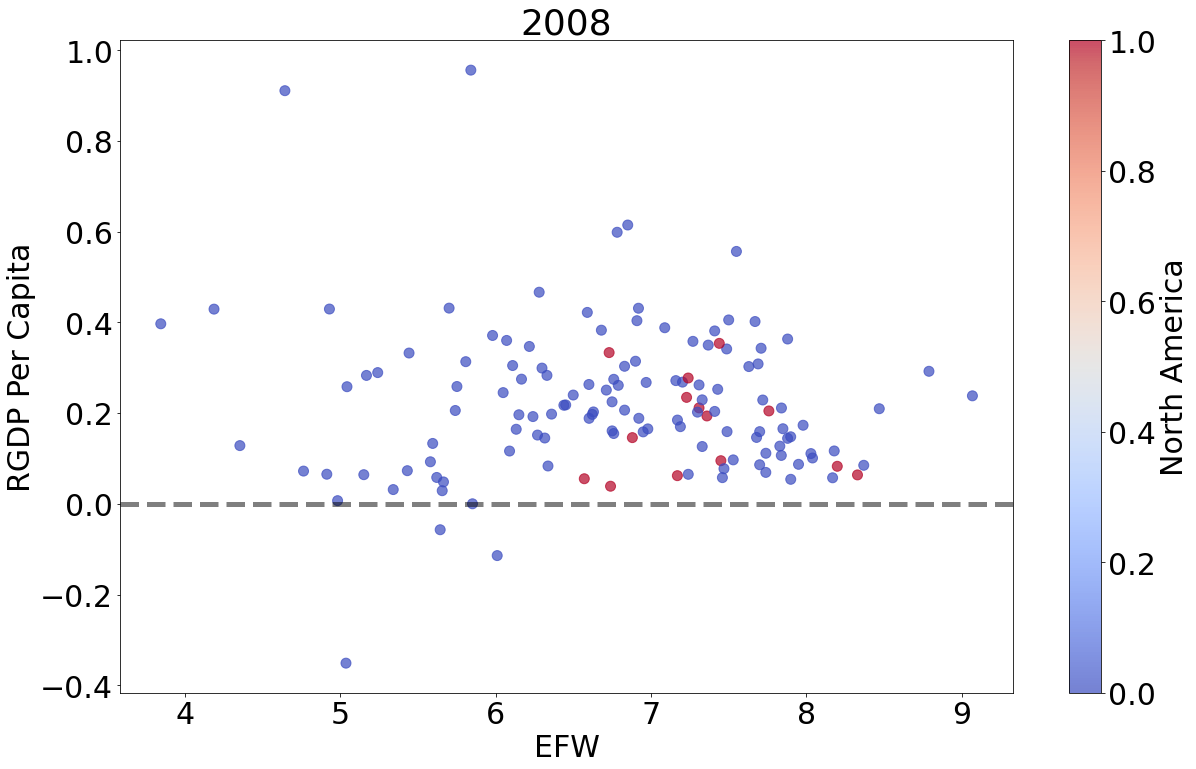

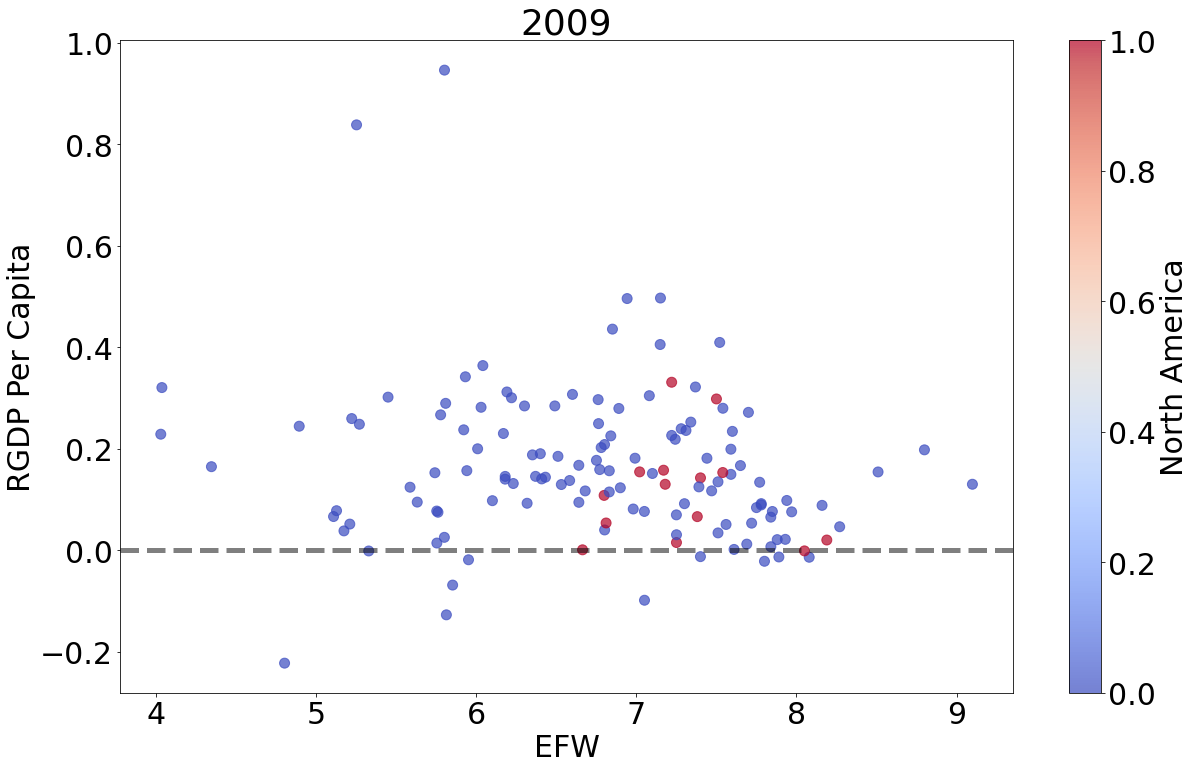

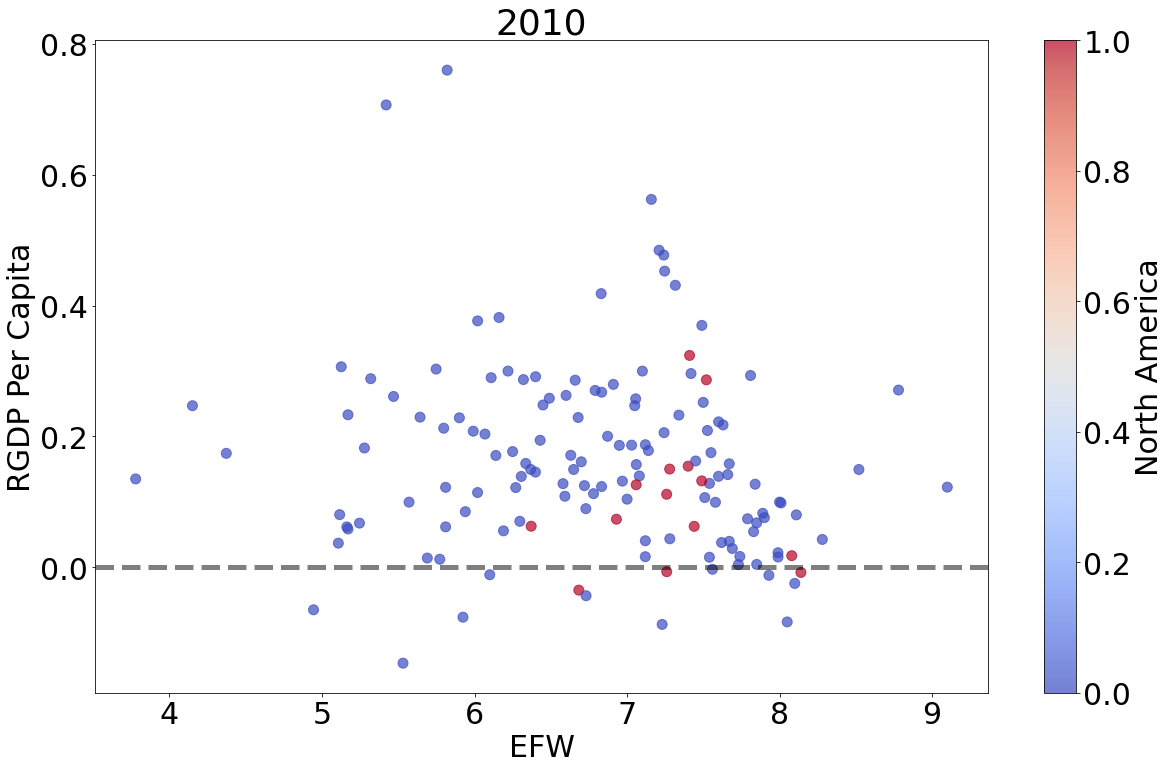

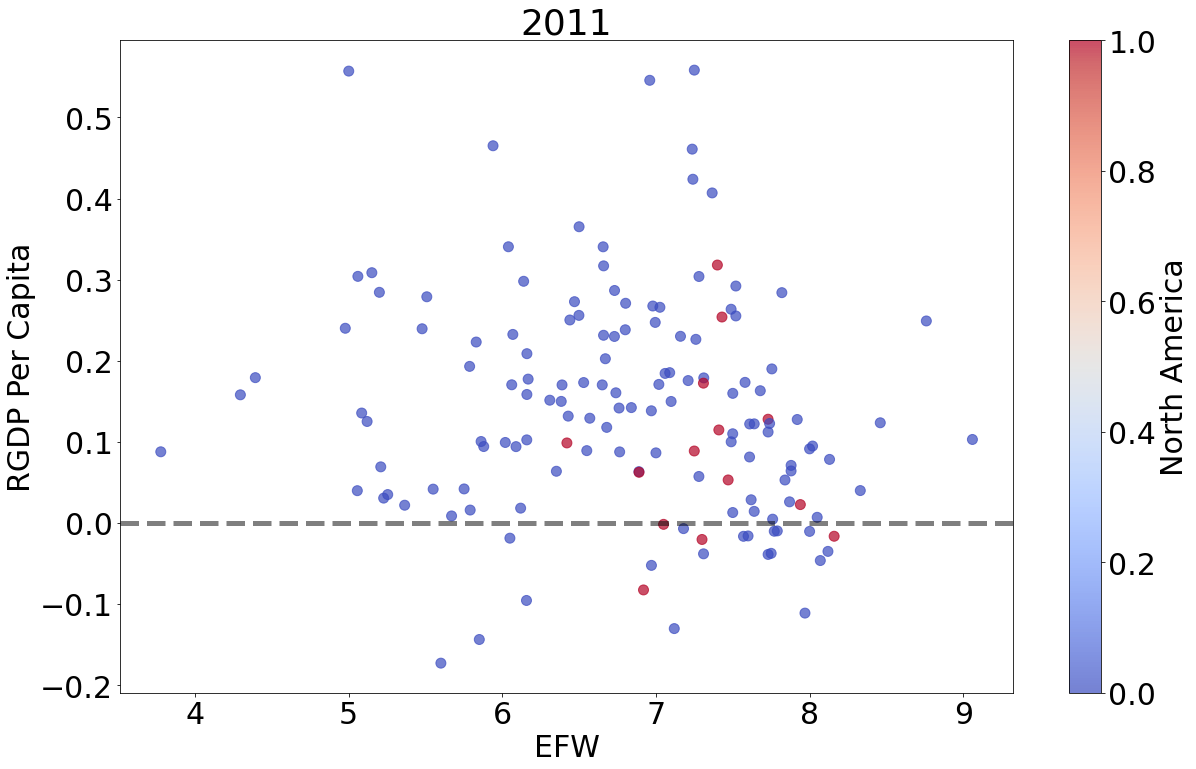

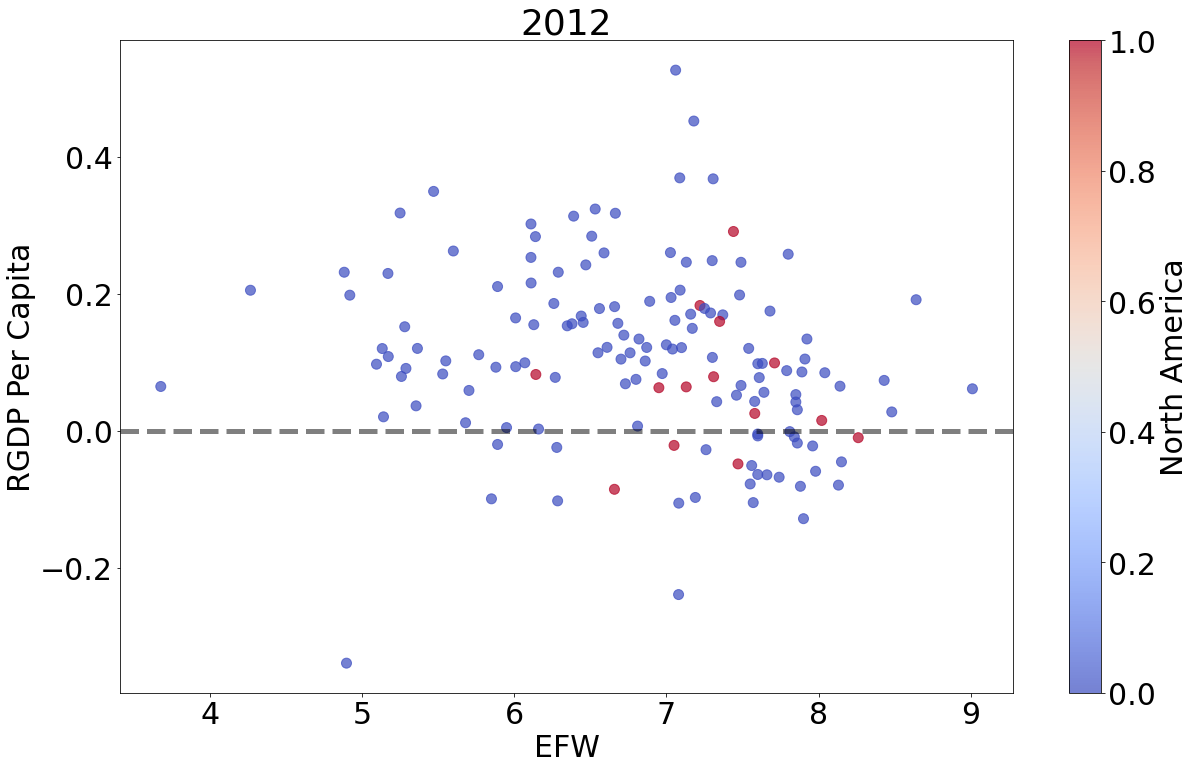

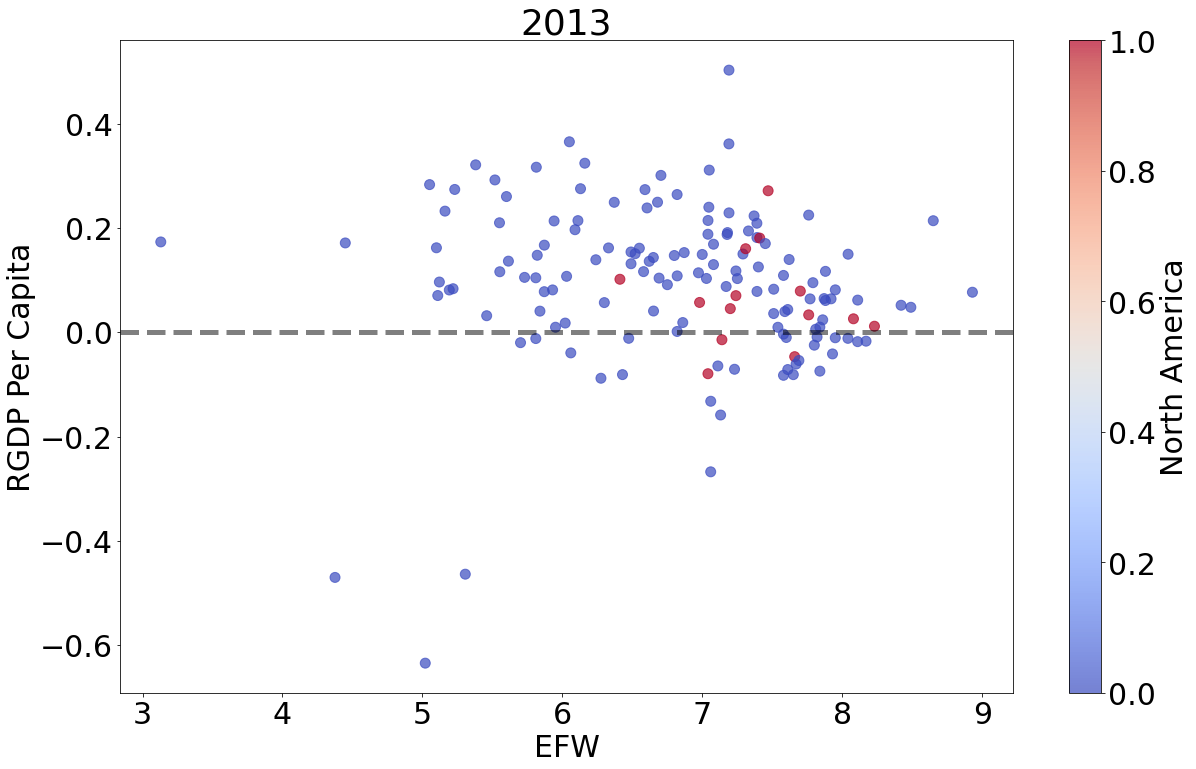

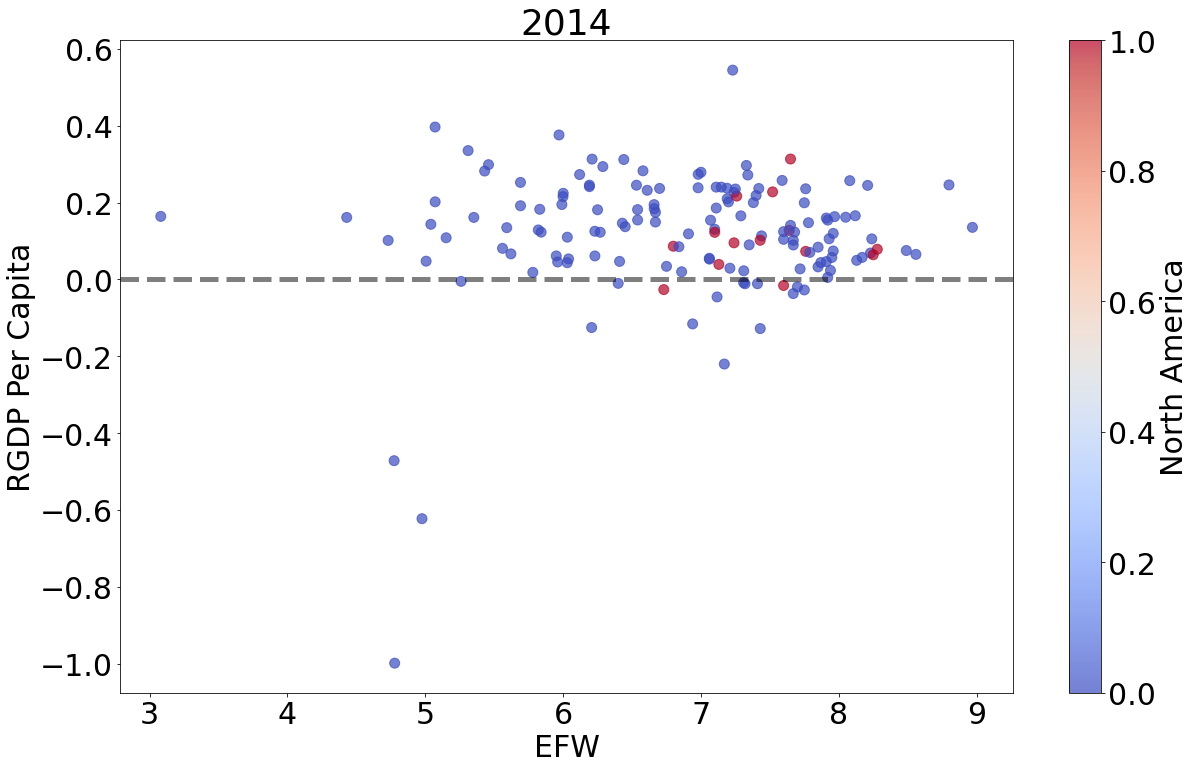

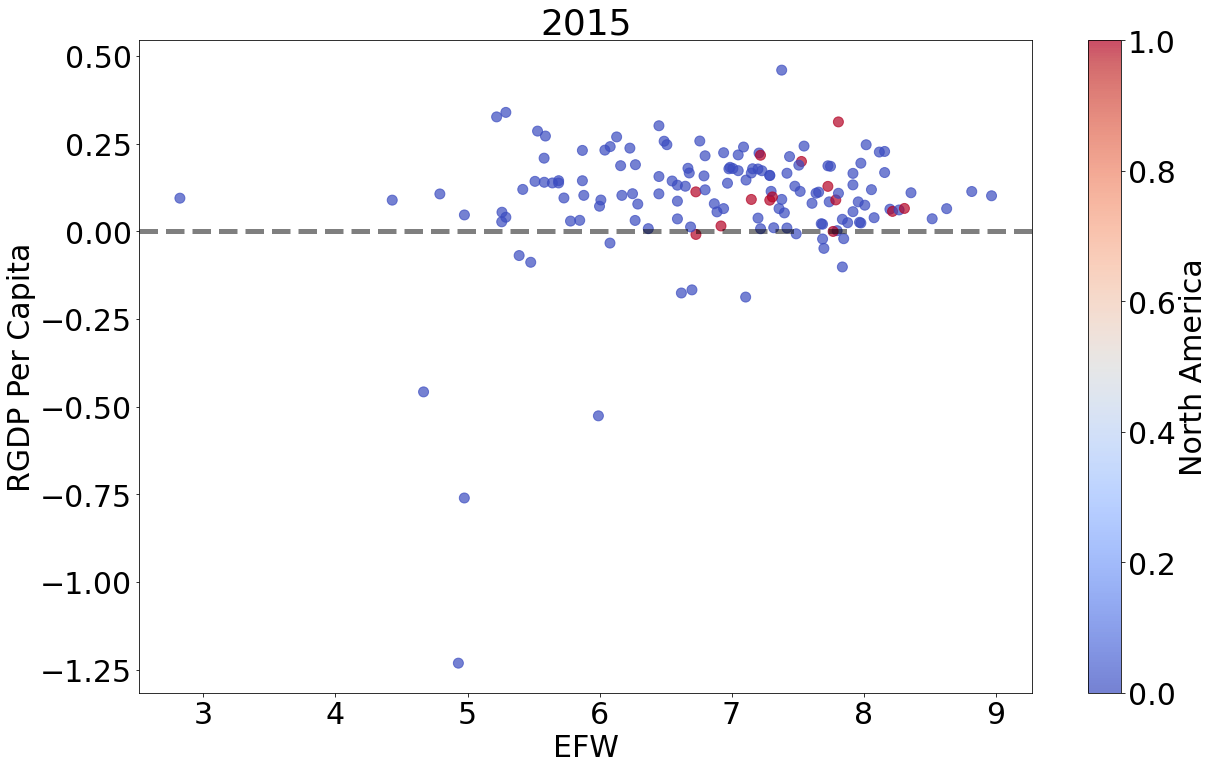

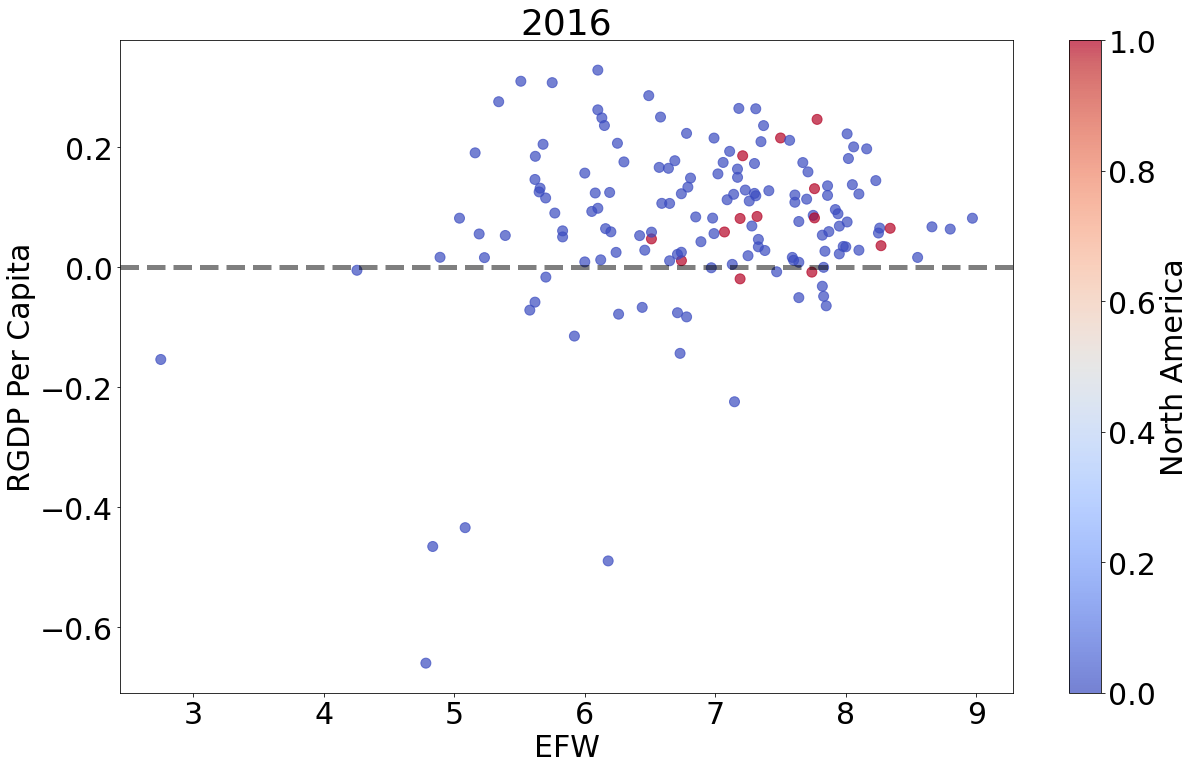

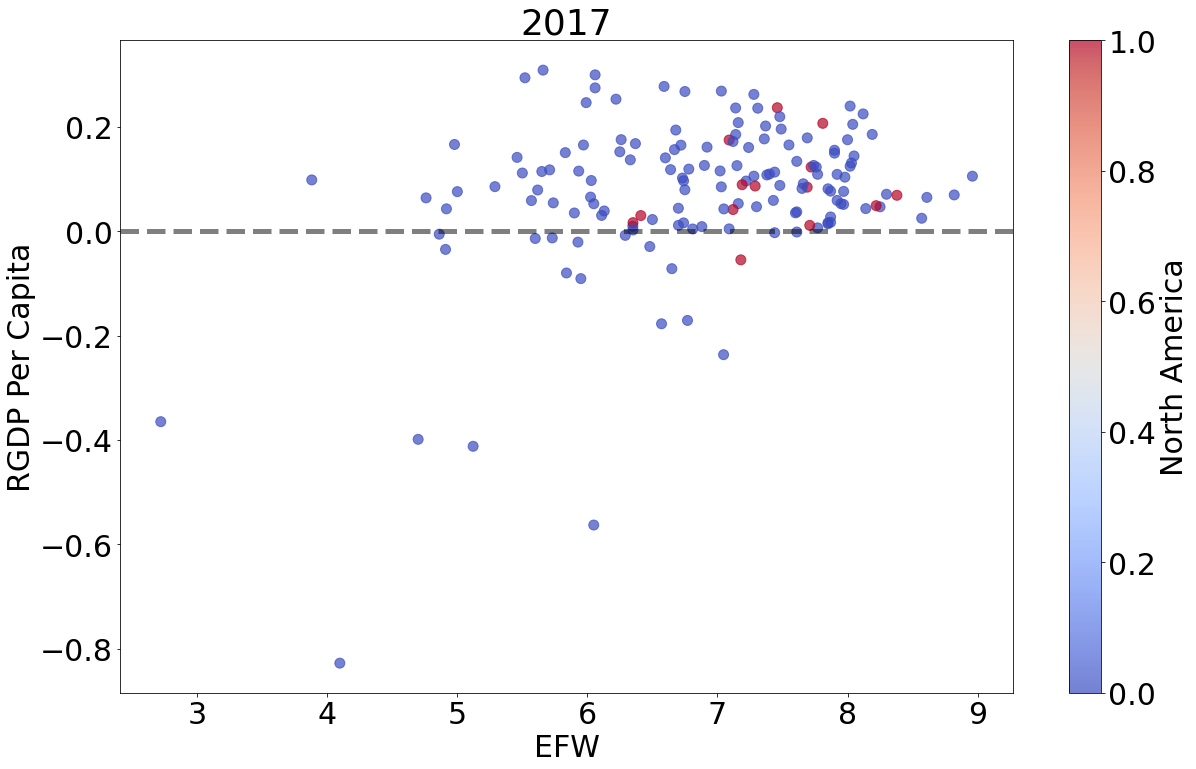

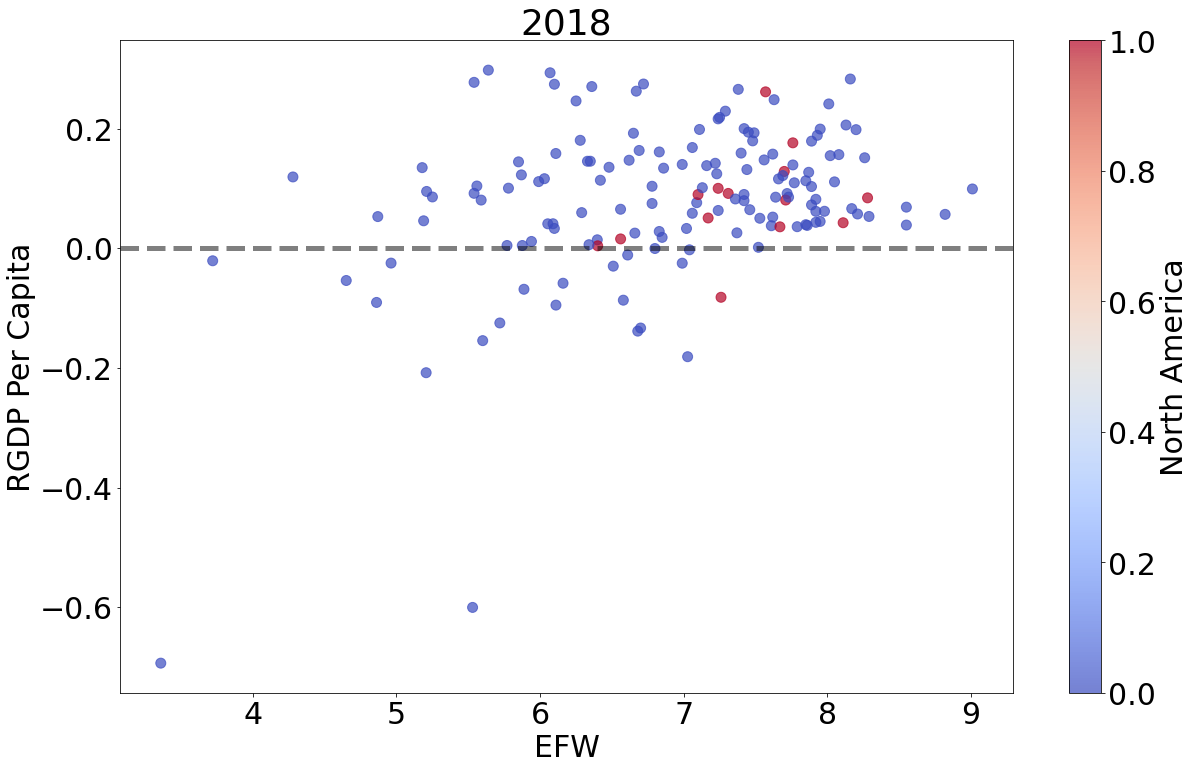

In [13]:
from matplotlib import cm
plt.rcParams.update({"font.size": 30})
years = data.dropna(subset = ["RGDP Per Capita"]).index.get_level_values("Year").unique()
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
for year in years:
#year = "2000"
    plot_data = data[data.index.get_level_values("Year") == year]
    fig, ax = plt.subplots(figsize = (20,12))
    plot_data.plot.scatter(x = "EFW",
                          y = "RGDP Per Capita",
                          c = "North America",
                          cmap = "coolwarm",
                          s = 100,
                          alpha = 0.7,
                          ax = ax)
    ax.set_title(str(year)[:4])
    ax.axhline(0, ls = "--", color = "k", alpha = 0.5, linewidth = 5)

In [14]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan

In [15]:
data

Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01                               NaN          NaN   
           1974-01-01                               NaN          NaN   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        1970-01-01                               NaN         NaN   
           1971-01-01                               NaN         NaN   
           1972-01-01                               NaN         NaN   
           1973-01-01                               NaN         NaN   
           1974-01-01                               NaN         NaN   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  North America  RGDP Per Capita 5-tile  
ISO_Code_3 Year                                                                
AGO        1970-01-01              NaN              0                     NaN  
           1971-01-01              NaN              0                     NaN  
           1972-01-01              NaN              0                     NaN  
           1973-01-01              NaN              0                     NaN  
           1974-01-01              NaN              0                     NaN  
...                                ...            ...                     ...  
ZWE        2014-01-01         0.215452              0                     NaN  
           2015-01-01         0.106888              0                     NaN  
           2016-01-01         0.012463              0                     NaN  
           2017-01-01        -0.013579              0                     NaN  
           2018-01-01         0.004606              0                     NaN  

[8085 rows x 10 columns]

In [20]:
def create_quantile(n,
                   data,
                   year,
                   quantile_var,
                   quantile_name):
    # index that indentifies countries for a given year
    year_index = data.index.get_level_values("Year") == year
    quantile_values_dict = {i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n + 1)}
    for index in data[year_index].index:
        # identify value of the variable of interest
        val = data.loc[index][quantile_var]
        for i in range(1, n + 1):
            if val <= quantile_values_dict[i]:
                data.loc[index, [quantile_name]] = int((n + 1) - i)
                break
        else:
            continue
    
for year in years:    
    create_quantile(n, data, year, quantile_var, quantile_name)
data.loc["USA"]

,Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita,North America,RGDP Per Capita 5-tile
Year,,,,,,,,,,
1970-01-01,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,NaN,1,NaN
1971-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1972-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1975-01-01,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,0.080100,1,4.0
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1977-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1978-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


<AxesSubplot:xlabel='EFW', ylabel='RGDP Per Capita'>

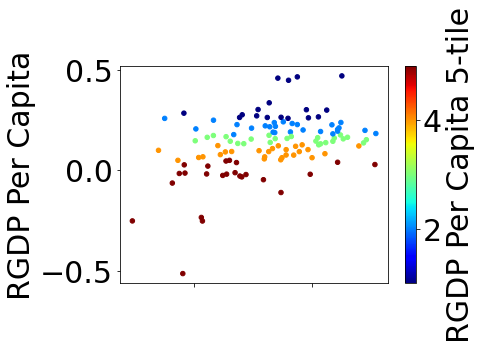

In [21]:
year = "2000"
plot_data = data[data.index.get_level_values("Year") == year]
plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = "jet")